# DATACO LATE DELIVERIES FORECASTING

## DATA UNDERSTANDING

In [1]:
#Importing the necessary librariers

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import copy

In [2]:
#Reading csv file without encountering Unicodedecode error

encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
for enc in encodings:
    try:
        df = pd.read_csv("C:\\Users\\karth\\OneDrive - Wichita State University\\Desktop\\Project\\archive (8)\\DataCoSupplyChainDataset.csv", encoding=enc)
        print(f"Successfully read file with encoding: {enc}")
        break
    except UnicodeDecodeError:
        pass

Successfully read file with encoding: latin-1


In [3]:
#Displaying Data frame
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,S

In [4]:
#Displaying top 5 rows
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
#Displaying bottom 5 rows
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,1005,Peterson,XXXXXXXXX,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.0,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,9141,Clark,XXXXXXXXX,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.0,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [6]:
#Displaying random rows
df.sample(20)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
121596,TRANSFER,3,4,130.550003,383.980011,Advance shipping,0,45,Fishing,Los Angeles,EE. UU.,XXXXXXXXX,Jerry,4815,Smith,XXXXXXXXX,Consumer,CA,4903 Lazy Parkway,90001.0,7,Fan Shop,33.979347,-118.250053,LATAM,Villa Nueva,Guatemala,4815,2/6/2015 13:57,2507,1004,16.000000,0.04,6266,399.980011,0.34,1,399.980011,383.980011,130.550003,Central America,Guatemala,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2/9/2015 13:57,Standard Class
153872,PAYMENT,6,4,110.860001,327.980011,Late delivery,1,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,3581,Pugh,XXXXXXXXX,Consumer,PR,3977 Colonial Towers,725.0,7,Fan Shop,18.216377,-66.370514,Pacific Asia,Tamworth,Australia,3581,12/13/2015 16:19,23750,1004,72.000000,0.18,59431,399.980011,0.34,1,399.980011,327.980011,110.860001,Oceania,Nueva Gales del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,12/19/2015 16:19,Standard Class
142679,PAYMENT,5,4,26.610001,173.929993,Late delivery,1,46,Indoor/Outdoor Games,Morristown,EE. UU.,XXXXXXXXX,Diana,289,Richards,XXXXXXXXX,Corporate,NJ,3593 Easy Embers Field,7960.0,7,Fan Shop,40.801193,-74.485611,Pacific Asia,Nanning,China,289,10/28/2015 9:23,20579,1014,25.990000,0.13,51419,49.980000,0.15,4,199.919998,173.929993,26.610001,Eastern Asia,Guangxi,PENDING_PAYMENT,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,11/2/2015 9:23,Standard Class
149103,DEBIT,6,4,65.019997,179.130005,Late delivery,1,76,Women's Clothing,Caguas,Puerto Rico,XXXXXXXXX,Cathleen,20738,Kaufman,XXXXXXXXX,Home Office,PR,472 Cinder Sky Farm,725.0,4,Apparel,18.220209,-66.037064,Pacific Asia,Guwahati,India,20738,1/31/2018 16:59,77185,1363,36.689999,0.17,180500,215.820007,0.36,1,215.820007,179.130005,65.019997,South Asia,Assam,COMPLETE,NaN,1363,76,NaN,http://images.acmesports.sports/Summer+dresses,Summer dresses,215.820007,0,2/6/2018 16:59,Standard Class
62316,PAYMENT,2,2,77.080002,163.990005,Shipping on time,0,48,Water Sports,Caguas,Puerto Rico,XXXXXXXXX,Wayne,4673,Hodges,XXXXXXXXX,Home Office,PR,7509 Iron Concession,725.0,7,Fan Shop,18.201117,-66.370590,LATAM,Cuernavaca,México,4673,4/8/2015 22:48,6711,1073,36.000000,0.18,16767,199.990005,0.47,1,199.990005,163.990005,77.080002,Central America,Morelos,PENDING_PAYMENT,NaN,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,4/10/2015 22:48,Second Class
122665,TRANSFER,4,2,86.669998,266.670013,Late delivery,1,69,Health and Beauty,Caguas,Puerto Rico,XXXXXXXXX,Keiko,18766,Raymond,XXXXXXXXX,Corporate,PR,696 Velvet Oak Ledge,725.0,12,Health and Beauty,18.266527,-66.037056,Pacific Asia,Yakarta,Indonesia,18766,1/2/2018 22:06,75213,1356,26.370001,0.09,178528,293.040008,0.33,1,293.040008,266.670013,86.669998,Southeast Asia,Yakarta,PENDING,NaN,1356,69,NaN,http://images.acmesports.sports/First+aid+kit,First aid kit,293.040008,0,1/6/2018 22:06,Second Class
151850,DEBIT,2,2,138.589996,395.980011,Shipping on time,0,45,Fishing,Caguas,Puer

In [7]:
#count of dictinct values in each column
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


In [8]:
#retrieve information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [9]:
#checking the percentage of null values
df.isnull().mean(axis=0)*100 

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

In [10]:
#Statistical summary of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [11]:
#Statistical summary of all the columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,180519,4,DEBIT,69295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days for shipping (real),180519.0,NaN,NaN,NaN,3.497654,1.623722,0.0,2.0,3.0,5.0,6.0
Days for shipment (scheduled),180519.0,NaN,NaN,NaN,2.931847,1.374449,0.0,2.0,4.0,4.0,4.0
Benefit per order,180519.0,NaN,NaN,NaN,21.974989,104.433526,-4274.97998,7.0,31.52,64.800003,911.799988
Sales per customer,180519.0,NaN,NaN,NaN,183.107609,120.04367,7.49,104.379997,163.990005,247.399994,1939.98999
Delivery Status,180519,4,Late delivery,98977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Late_delivery_risk,180519.0,NaN,NaN,NaN,0.548291,0.497664,0.0,0.0,1.0,1.0,1.0
Category Id,180519.0,NaN,NaN,NaN,31.851451,15.640064,2.0,18.0,29.0,45.0,76.0
Category Name,180519,50,Cleats,24551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer City,180519,563,Caguas,66770,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [13]:
# Replacing underscore from columns
# Assuming you have your DataFrame loaded as 'df'

# Define a function to replace spaces with underscores in a column name
def replace_spaces_with_underscores(column_name):
    return column_name.replace(" ", "_")

# Apply the function to all column names using a list comprehension
new_column_names = [replace_spaces_with_underscores(col) for col in df.columns]

# Rename the columns
df.columns = new_column_names

# Print the modified column names to verify
print(df.columns)

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Email', 'Customer_Fname', 'Customer_Id',
       'Customer_Lname', 'Customer_Password', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Customer_Id',
       'order_date_(DateOrders)', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Id',
       'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Order_Zipcode', 'Product_Card_Id', 'Product_Category_Id',
       'Product_De

In [14]:
#renaming the column names

df.rename(columns={'Days_for_shipping_(real)': 'Days_for_shipping_real',
                   'Days_for_shipment_(scheduled)':'Days_for_shipment_scheduled',
                    'order_date_(DateOrders)':'order_date_DateOrders',
                   'shipping_date_(DateOrders)':'shipping_date_DateOrders',
                  'Order_Item_Cardprod_Id':'Product_Card_Id'},inplace=True)


In [15]:
#dropping null values from the columns

df=df.drop(columns=['Product_Description', 'Order_Zipcode','Customer_Email']) 

In [16]:
df.isnull().mean(axis=0)*100 #checking the percentage of null values

Type                           0.000000
Days_for_shipping_real         0.000000
Days_for_shipment_scheduled    0.000000
Benefit_per_order              0.000000
Sales_per_customer             0.000000
Delivery_Status                0.000000
Late_delivery_risk             0.000000
Category_Id                    0.000000
Category_Name                  0.000000
Customer_City                  0.000000
Customer_Country               0.000000
Customer_Fname                 0.000000
Customer_Id                    0.000000
Customer_Lname                 0.004432
Customer_Password              0.000000
Customer_Segment               0.000000
Customer_State                 0.000000
Customer_Street                0.000000
Customer_Zipcode               0.001662
Department_Id                  0.000000
Department_Name                0.000000
Latitude                       0.000000
Longitude                      0.000000
Market                         0.000000
Order_City                     0.000000


In [18]:
# Dropping null values from the rows
df=df.dropna()

In [19]:
df.isnull().mean(axis=0)*100 #checking the percentage of null values

Type                           0.0
Days_for_shipping_real         0.0
Days_for_shipment_scheduled    0.0
Benefit_per_order              0.0
Sales_per_customer             0.0
Delivery_Status                0.0
Late_delivery_risk             0.0
Category_Id                    0.0
Category_Name                  0.0
Customer_City                  0.0
Customer_Country               0.0
Customer_Fname                 0.0
Customer_Id                    0.0
Customer_Lname                 0.0
Customer_Password              0.0
Customer_Segment               0.0
Customer_State                 0.0
Customer_Street                0.0
Customer_Zipcode               0.0
Department_Id                  0.0
Department_Name                0.0
Latitude                       0.0
Longitude                      0.0
Market                         0.0
Order_City                     0.0
Order_Country                  0.0
Order_Customer_Id              0.0
order_date_DateOrders          0.0
Order_Id            

In [20]:
#checking for duplicate rows

df.duplicated().sum() 

0

In [21]:
#checking datatypes of columns

df.dtypes

Type                            object
Days_for_shipping_real           int64
Days_for_shipment_scheduled      int64
Benefit_per_order              float64
Sales_per_customer             float64
Delivery_Status                 object
Late_delivery_risk               int64
Category_Id                      int64
Category_Name                   object
Customer_City                   object
Customer_Country                object
Customer_Fname                  object
Customer_Id                      int64
Customer_Lname                  object
Customer_Password               object
Customer_Segment                object
Customer_State                  object
Customer_Street                 object
Customer_Zipcode               float64
Department_Id                    int64
Department_Name                 object
Latitude                       float64
Longitude                      float64
Market                          object
Order_City                      object
Order_Country            

In [22]:
#Dropping unncessary columns

df.drop(columns=['Product_Image','Customer_Password','Product_Category_Id'],inplace=True)

In [23]:
df

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_DateOrders,Order_Id,Product_Card_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Name,Product_Price,Product_Status,shipping_date_DateOrders,Shipping_Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,Maria,1005,Peterson,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,1/16/2016 3:40,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,Ronald,9141,Clark,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,1/16/2016 1:34,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,John,291,Smith,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.

In [24]:
print(df.dtypes['shipping_date_DateOrders'])

object


In [24]:
#changing datatype to Date time

df['shipping_date_DateOrders'] = pd.to_datetime(df['shipping_date_DateOrders'])

In [25]:
#extract date part

df['shipping_date_DateOrders'] = df['shipping_date_DateOrders'].dt.date

In [26]:
df['order_date_DateOrders']

0         1/31/2018 22:56
1         1/13/2018 12:27
2         1/13/2018 12:06
3         1/13/2018 11:45
4         1/13/2018 11:24
               ...       
180514     1/16/2016 3:40
180515     1/16/2016 1:34
180516    1/15/2016 21:00
180517    1/15/2016 20:18
180518    1/15/2016 18:54
Name: order_date_DateOrders, Length: 180508, dtype: object

In [27]:
df['order_date_DateOrders']=pd.to_datetime(df['order_date_DateOrders'])

In [28]:
df['order_date_DateOrders']= df['order_date_DateOrders'].dt.date

In [29]:
# reading to string

df['shipping_date_DateOrders'] = df['shipping_date_DateOrders'].astype(str)

In [30]:
#removing leading and trail spaces from column

df['shipping_date_DateOrders'].str.strip()

0         2018-02-03
1         2018-01-18
2         2018-01-17
3         2018-01-16
4         2018-01-15
             ...    
180514    2016-01-20
180515    2016-01-19
180516    2016-01-20
180517    2016-01-18
180518    2016-01-19
Name: shipping_date_DateOrders, Length: 180508, dtype: object

In [31]:
#converitng in YMD format

df['shipping_date_DateOrders']=pd.to_datetime(df['shipping_date_DateOrders'], format="%Y-%m-%d", errors='coerce')

In [32]:
df['order_date_DateOrders'] = pd.to_datetime(df['shipping_date_DateOrders'], format="%Y-%m-%d", errors='coerce')


In [33]:
df[['Category_Id','Customer_Id','Department_Id','Order_Id','Order_Customer_Id','Order_Item_Id','Product_Card_Id']]=df[['Category_Id','Customer_Id','Department_Id','Order_Id','Order_Customer_Id','Order_Item_Id','Product_Card_Id']].astype(str)

In [34]:
df.dtypes

Type                                   object
Days_for_shipping_real                  int64
Days_for_shipment_scheduled             int64
Benefit_per_order                     float64
Sales_per_customer                    float64
Delivery_Status                        object
Late_delivery_risk                      int64
Category_Id                            object
Category_Name                          object
Customer_City                          object
Customer_Country                       object
Customer_Fname                         object
Customer_Id                            object
Customer_Lname                         object
Customer_Segment                       object
Customer_State                         object
Customer_Street                        object
Customer_Zipcode                      float64
Department_Id                          object
Department_Name                        object
Latitude                              float64
Longitude                         

In [35]:
#creating shipping_id column

df.loc[:, 'Shipping_Id'] = range(1, len(df) + 1)

In [36]:
#converting to string

df['Shipping_Id']= df['Shipping_Id'].astype(str)

In [41]:
df

,Type,Days_for_shipping_real,Days_for_shipment_scheduled,Benefit_per_order,Sales_per_customer,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode,Department_Id,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Customer_Id,order_date_DateOrders,Order_Id,Product_Card_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Product_Card_Id,Product_Name,Product_Price,Product_Status,shipping_date_DateOrders,Shipping_Mode,Shipping_Id
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Cally,20755,Holloway,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-02-03,77202,1360,13.110000,0.04,180517,327.750000,0.29,1,327.750000,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,Smart watch,327.750000,0,2018-02-03,Standard Class,1
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,Irene,19492,Luna,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-18,75939,1360,16.389999,0.05,179254,327.750000,-0.80,1,327.750000,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,Smart watch,327.750000,0,2018-01-18,Standard Class,2
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,Gillian,19491,Maldonado,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-17,75938,1360,18.030001,0.06,179253,327.750000,-0.80,1,327.750000,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,Smart watch,327.750000,0,2018-01-17,Standard Class,3
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,Tana,19490,Tate,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-16,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,Smart watch,327.750000,0,2018-01-16,Standard Class,4
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,Orli,19489,Hendricks,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-15,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,Smart watch,327.750000,0,2018-01-15,Standard Class,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,EE. UU.,Maria,1005,Peterson,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,1005,2016-01-20,26043,1004,0.000000,0.00,65177,399.980011,0.10,1,399.980011,399.980011,40.000000,Eastern Asia,Shanghái,CLOSED,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-20,Standard Class,180504
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,EE. UU.,Ronald,9141,Clark,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,9141,2016-01-19,26037,1004,4.000000,0.01,65161,399.980011,-1.55,1,399.980011,395.980011,-613.770019,Eastern Asia,Osaka,COMPLETE,1004,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,2016-01-19,Second Class,180505
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,John,291,Smith,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific

### Created ERD Layout For AD-HOC Analysis

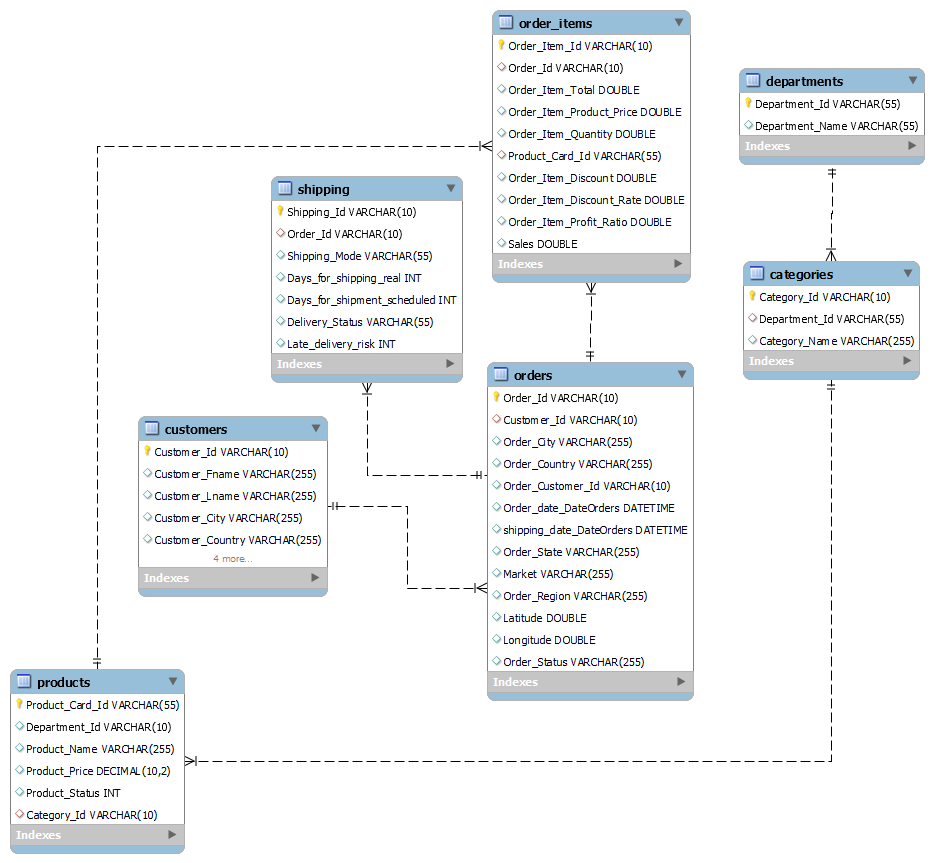

In [38]:
#creating dataframes after normalising

categories_df= df[['Category_Id','Category_Name','Department_Id']]
products_df=df[['Product_Card_Id','Department_Id','Product_Name','Product_Price','Product_Status','Category_Id']]
customers_df=df[['Customer_Id','Customer_Fname','Customer_Lname','Customer_City','Customer_Country','Customer_Segment','Customer_State','Customer_Street','Customer_Zipcode']]
orders_df=df[['Order_Id','Order_City','Customer_Id','Order_Country','Order_Customer_Id','order_date_DateOrders','shipping_date_DateOrders','Order_State','Market','Order_Region','Latitude','Longitude','Order_Status']]
order_items_df= df[['Order_Item_Id','Order_Id','Order_Item_Total','Order_Item_Product_Price','Order_Item_Quantity','Product_Card_Id','Order_Item_Discount','Order_Item_Discount_Rate','Order_Item_Profit_Ratio','Sales']]
shipping_df=df[['Shipping_Id','Order_Id','Shipping_Mode','Days_for_shipping_real','Days_for_shipment_scheduled','Delivery_Status','Late_delivery_risk']]
departments_df=df[['Department_Id','Department_Name']]

In [39]:
products_df

,Product_Card_Id,Product_Card_Id,Department_Id,Product_Name,Product_Price,Product_Status,Category_Id
0,1360,1360,2,Smart watch,327.750000,0,73
1,1360,1360,2,Smart watch,327.750000,0,73
2,1360,1360,2,Smart watch,327.750000,0,73
3,1360,1360,2,Smart watch,327.750000,0,73
4,1360,1360,2,Smart watch,327.750000,0,73
...,...,...,...,...,...,...,...
180514,1004,1004,7,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,45
180515,1004,1004,7,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,45
180516,1004,1004,7,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,45
180517,1004,1004,7,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,45


### Dropping duplicates from dataframes

In [40]:
#Dropping duplicates from dataframes

products_df=products_df.drop_duplicates(subset=['Product_Card_Id','Department_Id','Product_Name','Product_Price','Product_Status','Category_Id'])

In [41]:
products_df

,Product_Card_Id,Product_Card_Id,Department_Id,Product_Name,Product_Price,Product_Status,Category_Id
0,1360,1360,2,Smart watch,327.750000,0,73
48,365,365,4,Perfect Fitness Perfect Rip Deck,59.990002,0,17
49,627,627,5,Under Armour Girls' Toddler Spine Surge Runni,39.990002,0,29
50,502,502,5,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,24
55,278,278,3,Under Armour Men's Compression EV SL Slide,44.990002,0,13
...,...,...,...,...,...,...,...
52077,646,646,6,Merrell Women's Grassbow Sport Hiking Shoe,99.989998,0,30
52147,1361,1361,7,Toys,11.540000,0,74
52676,1073,1073,7,Pelican Sunstream 100 Kayak,199.990005,0,48
77012,1059,1059,7,Pelican Maverick 100X Kayak,349.989990,0,48


In [42]:
orders_df

,Order_Id,Order_City,Customer_Id,Order_Country,Order_Customer_Id,order_date_DateOrders,shipping_date_DateOrders,Order_State,Market,Order_Region,Latitude,Longitude,Order_Status
0,77202,Bekasi,20755,Indonesia,20755,2018-02-03,2018-02-03,Java Occidental,Pacific Asia,Southeast Asia,18.251453,-66.037056,COMPLETE
1,75939,Bikaner,19492,India,19492,2018-01-18,2018-01-18,Rajastán,Pacific Asia,South Asia,18.279451,-66.037064,PENDING
2,75938,Bikaner,19491,India,19491,2018-01-17,2018-01-17,Rajastán,Pacific Asia,South Asia,37.292233,-121.881279,CLOSED
3,75937,Townsville,19490,Australia,19490,2018-01-16,2018-01-16,Queensland,Pacific Asia,Oceania,34.125946,-118.291016,COMPLETE
4,75936,Townsville,19489,Australia,19489,2018-01-15,2018-01-15,Queensland,Pacific Asia,Oceania,18.253769,-66.037048,PENDING_PAYMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,26043,Shanghái,1005,China,1005,2016-01-20,2016-01-20,Shanghái,Pacific Asia,Eastern Asia,40.640930,-73.942711,CLOSED
180515,26037,Hirakata,9141,Japón,9141,2016-01-19,2016-01-19,Osaka,Pacific Asia,Eastern Asia,35.362545,-119.018700,COMPLETE
180516,26024,Adelaide,291,Australia,291,2016-01-20,2016-01-20,Australia del Sur,Pacific Asia,Oceania,41.629959,-72.967155,PENDING
180517,26022,Adelaide,2813,Australia,2813,2016-01-18,2016-01-18,Australia del Sur,Pacific Asia,Oceania,18.213350,-66.370575,PENDING_PAYMENT


In [43]:
orders_df=orders_df.drop_duplicates(subset=['Order_Id','Order_City','Customer_Id','Order_Country','Order_Customer_Id','order_date_DateOrders','shipping_date_DateOrders','Order_State','Market','Order_Region','Latitude','Longitude','Order_Status'])

In [44]:
categories_df

,Category_Id,Category_Name,Department_Id
0,73,Sporting Goods,2
1,73,Sporting Goods,2
2,73,Sporting Goods,2
3,73,Sporting Goods,2
4,73,Sporting Goods,2
...,...,...,...
180514,45,Fishing,7
180515,45,Fishing,7
180516,45,Fishing,7
180517,45,Fishing,7


In [45]:
categories_df=categories_df.drop_duplicates(subset=['Category_Id','Category_Name'])

In [46]:
categories_df

,Category_Id,Category_Name,Department_Id
0,73,Sporting Goods,2
48,17,Cleats,4
49,29,Shop By Sport,5
50,24,Women's Apparel,5
55,13,Electronics,3
56,12,Boxing & MMA,3
59,9,Cardio Equipment,3
61,41,Trade-In,6
62,37,Electronics,6
117,38,Kids' Golf Clubs,6


In [47]:
departments_df

,Department_Id,Department_Name
0,2,Fitness
1,2,Fitness
2,2,Fitness
3,2,Fitness
4,2,Fitness
...,...,...
180514,7,Fan Shop
180515,7,Fan Shop
180516,7,Fan Shop
180517,7,Fan Shop


In [48]:
departments_df=departments_df.drop_duplicates(subset=['Department_Id','Department_Name'])

In [49]:
departments_df

,Department_Id,Department_Name
0,2,Fitness
48,4,Apparel
49,5,Golf
55,3,Footwear
61,6,Outdoors
118,7,Fan Shop
145,10,Technology
1360,8,Book Shop
1585,9,Discs Shop
3205,11,Pet Shop


In [50]:
shipping_df=shipping_df.drop_duplicates(subset=['Order_Id','Shipping_Id','Shipping_Mode','Days_for_shipping_real','Days_for_shipment_scheduled','Delivery_Status','Late_delivery_risk'])

In [51]:
shipping_df

,Shipping_Id,Order_Id,Shipping_Mode,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Late_delivery_risk
0,1,77202,Standard Class,3,4,Advance shipping,0
1,2,75939,Standard Class,5,4,Late delivery,1
2,3,75938,Standard Class,4,4,Shipping on time,0
3,4,75937,Standard Class,3,4,Advance shipping,0
4,5,75936,Standard Class,2,4,Advance shipping,0
...,...,...,...,...,...,...,...
180514,180504,26043,Standard Class,4,4,Shipping on time,0
180515,180505,26037,Second Class,3,2,Late delivery,1
180516,180506,26024,Standard Class,5,4,Late delivery,1
180517,180507,26022,Standard Class,3,4,Advance shipping,0


In [52]:
shipping_df.head(100)

,Shipping_Id,Order_Id,Shipping_Mode,Days_for_shipping_real,Days_for_shipment_scheduled,Delivery_Status,Late_delivery_risk
0,1,77202,Standard Class,3,4,Advance shipping,0
1,2,75939,Standard Class,5,4,Late delivery,1
2,3,75938,Standard Class,4,4,Shipping on time,0
3,4,75937,Standard Class,3,4,Advance shipping,0
4,5,75936,Standard Class,2,4,Advance shipping,0
...,...,...,...,...,...,...,...
95,96,57106,Standard Class,2,4,Advance shipping,0
96,97,6245,Standard Class,6,4,Late delivery,1
97,98,52166,Standard Class,2,4,Advance shipping,0
98,99,56172,Standard Class,3,4,Advance shipping,0


In [53]:
customers_df

,Customer_Id,Customer_Fname,Customer_Lname,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
0,20755,Cally,Holloway,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0
1,19492,Irene,Luna,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0
2,19491,Gillian,Maldonado,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0
3,19490,Tana,Tate,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0
4,19489,Orli,Hendricks,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0
...,...,...,...,...,...,...,...,...,...
180514,1005,Maria,Peterson,Brooklyn,EE. UU.,Home Office,NY,1322 Broad Glade,11207.0
180515,9141,Ronald,Clark,Bakersfield,EE. UU.,Corporate,CA,7330 Broad Apple Moor,93304.0
180516,291,John,Smith,Bristol,EE. UU.,Corporate,CT,97 Burning Landing,6010.0
180517,2813,Mary,Smith,Caguas,Puerto Rico,Consumer,PR,2585 Silent Autumn Landing,725.0


In [54]:
customers_df=customers_df.drop_duplicates(subset=['Customer_Id','Customer_Fname','Customer_Lname','Customer_City','Customer_Country','Customer_Segment','Customer_State','Customer_Street','Customer_Zipcode'])

In [55]:
customers_df

,Customer_Id,Customer_Fname,Customer_Lname,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Street,Customer_Zipcode
0,20755,Cally,Holloway,Caguas,Puerto Rico,Consumer,PR,5365 Noble Nectar Island,725.0
1,19492,Irene,Luna,Caguas,Puerto Rico,Consumer,PR,2679 Rustic Loop,725.0
2,19491,Gillian,Maldonado,San Jose,EE. UU.,Consumer,CA,8510 Round Bear Gate,95125.0
3,19490,Tana,Tate,Los Angeles,EE. UU.,Home Office,CA,3200 Amber Bend,90027.0
4,19489,Orli,Hendricks,Caguas,Puerto Rico,Corporate,PR,8671 Iron Anchor Corners,725.0
...,...,...,...,...,...,...,...,...,...
179260,18586,Diana,Tran,Caguas,Puerto Rico,Home Office,PR,1802 Broad Carrefour,725.0
179261,16322,Anika,Davenport,Caguas,Puerto Rico,Home Office,PR,8284 Colonial Gate Path,725.0
179262,18579,Yuri,Smith,Caguas,Puerto Rico,Home Office,PR,2248 Heather Mews,725.0
179263,16244,Hyacinth,Witt,Caguas,Puerto Rico,Home Office,PR,7247 Honey Prairie Field,725.0


In [56]:
df.dtypes

Type                                   object
Days_for_shipping_real                  int64
Days_for_shipment_scheduled             int64
Benefit_per_order                     float64
Sales_per_customer                    float64
Delivery_Status                        object
Late_delivery_risk                      int64
Category_Id                            object
Category_Name                          object
Customer_City                          object
Customer_Country                       object
Customer_Fname                         object
Customer_Id                            object
Customer_Lname                         object
Customer_Segment                       object
Customer_State                         object
Customer_Street                        object
Customer_Zipcode                      float64
Department_Id                          object
Department_Name                        object
Latitude                              float64
Longitude                         

### Exporting to CSV for Ad-Hoc Analysis in SQL

In [57]:
categories_df.to_csv('C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/categories.csv',index=False)
products_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/products.csv",index=False)
customers_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/customers.csv",index=False)
orders_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/orders.csv",index=False)
order_items_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/order_items.csv",index=False)
shipping_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/shipping.csv",index=False)
departments_df.to_csv("C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/departments.csv",index=False)

In [58]:
df.columns

Index(['Type', 'Days_for_shipping_real', 'Days_for_shipment_scheduled',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Fname', 'Customer_Id', 'Customer_Lname',
       'Customer_Segment', 'Customer_State', 'Customer_Street',
       'Customer_Zipcode', 'Department_Id', 'Department_Name', 'Latitude',
       'Longitude', 'Market', 'Order_City', 'Order_Country',
       'Order_Customer_Id', 'order_date_DateOrders', 'Order_Id',
       'Product_Card_Id', 'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Product_Card_Id', 'Product_Name', 'Product_Price', 'Product_Status',
       'shipping_date_DateOrders', 'Shipping_Mode', 'Shipping_Id']

In [59]:
df.columns

Index(['Type', 'Days_for_shipping_real', 'Days_for_shipment_scheduled',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_City',
       'Customer_Country', 'Customer_Fname', 'Customer_Id', 'Customer_Lname',
       'Customer_Segment', 'Customer_State', 'Customer_Street',
       'Customer_Zipcode', 'Department_Id', 'Department_Name', 'Latitude',
       'Longitude', 'Market', 'Order_City', 'Order_Country',
       'Order_Customer_Id', 'order_date_DateOrders', 'Order_Id',
       'Product_Card_Id', 'Order_Item_Discount', 'Order_Item_Discount_Rate',
       'Order_Item_Id', 'Order_Item_Product_Price', 'Order_Item_Profit_Ratio',
       'Order_Item_Quantity', 'Sales', 'Order_Item_Total',
       'Order_Profit_Per_Order', 'Order_Region', 'Order_State', 'Order_Status',
       'Product_Card_Id', 'Product_Name', 'Product_Price', 'Product_Status',
       'shipping_date_DateOrders', 'Shipping_Mode', 'Shipping_Id']

In [60]:
df.drop(columns=['Customer_Street','Category_Id','Delivery_Status','Days_for_shipping_real','Days_for_shipment_scheduled'],inplace=True)

In [61]:
df.drop(columns=['order_date_DateOrders','Product_Status','shipping_date_DateOrders','Customer_Fname'],inplace=True)

In [62]:
df.drop(columns=['Order_Item_Product_Price','Product_Price','Order_Item_Id','Product_Card_Id','Shipping_Id','Order_Profit_Per_Order'],inplace=True)

In [63]:
df.drop(columns=['Customer_Lname','Customer_Id','Department_Id','Order_Customer_Id','Order_Id'],inplace=True)

In [64]:
df.dtypes

Type                         object
Benefit_per_order           float64
Sales_per_customer          float64
Late_delivery_risk            int64
Category_Name                object
Customer_City                object
Customer_Country             object
Customer_Segment             object
Customer_State               object
Customer_Zipcode            float64
Department_Name              object
Latitude                    float64
Longitude                   float64
Market                       object
Order_City                   object
Order_Country                object
Order_Item_Discount         float64
Order_Item_Discount_Rate    float64
Order_Item_Profit_Ratio     float64
Order_Item_Quantity           int64
Sales                       float64
Order_Item_Total            float64
Order_Region                 object
Order_State                  object
Order_Status                 object
Product_Name                 object
Shipping_Mode                object
dtype: object

In [65]:
#Seperate Numerical and Categorical Variables

cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Type', 'Category_Name', 'Customer_City', 'Customer_Country',
       'Customer_Segment', 'Customer_State', 'Department_Name', 'Market',
       'Order_City', 'Order_Country', 'Order_Region', 'Order_State',
       'Order_Status', 'Product_Name', 'Shipping_Mode'],
      dtype='object')
Numerical Variables:
['Benefit_per_order', 'Sales_per_customer', 'Late_delivery_risk', 'Customer_Zipcode', 'Latitude', 'Longitude', 'Order_Item_Discount', 'Order_Item_Discount_Rate', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales', 'Order_Item_Total']


# EDA

Class Distribution (Percentage):
1    54.829703
0    45.170297
Name: Late_delivery_risk, dtype: float64


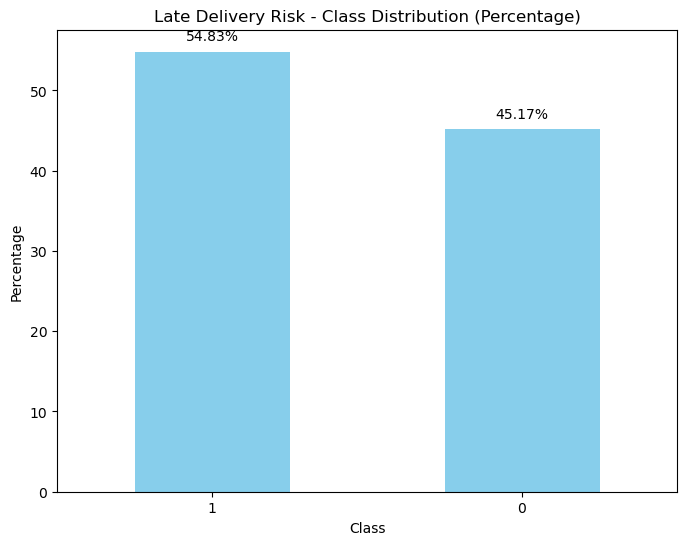

In [66]:
# Assuming 'df' is your DataFrame containing the data
# 'Late_delivery_risk' is the target variable

# Calculate class distribution as percentages
class_distribution_percentage = df['Late_delivery_risk'].value_counts(normalize=True) * 100

# Print the class distribution as percentages
print("Class Distribution (Percentage):")
print(class_distribution_percentage)

# Create a bar plot to visualize the class distribution as percentages
plt.figure(figsize=(8, 6))
ax = class_distribution_percentage.plot(kind='bar', color='skyblue')
plt.title('Late Delivery Risk - Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Label the bars with percentages
for i, v in enumerate(class_distribution_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

### EDA Univariate Analysis

Benefit_per_order
Skew: -4.74


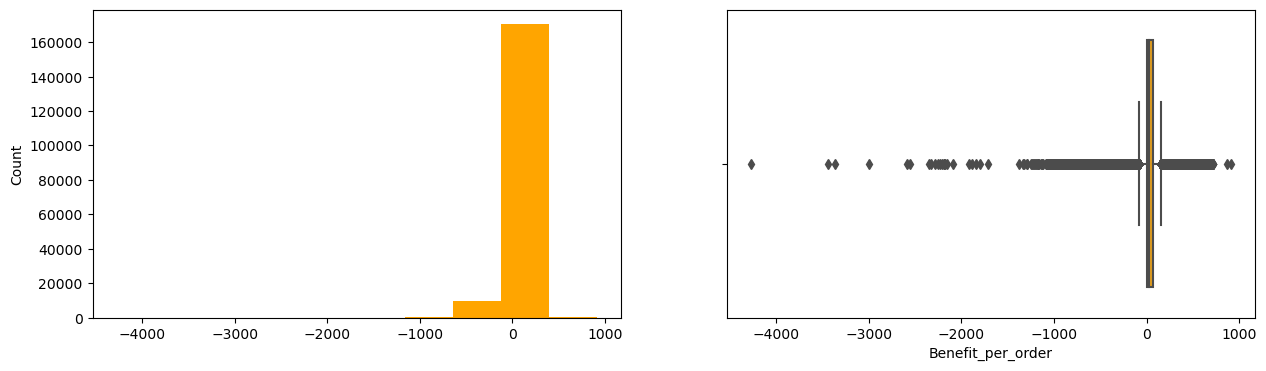

Sales_per_customer
Skew: 2.89


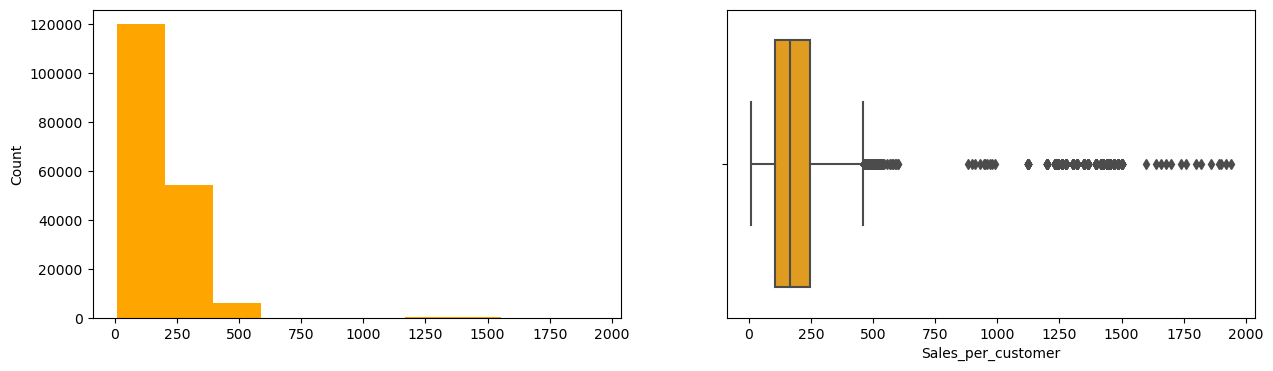

Late_delivery_risk
Skew: -0.19


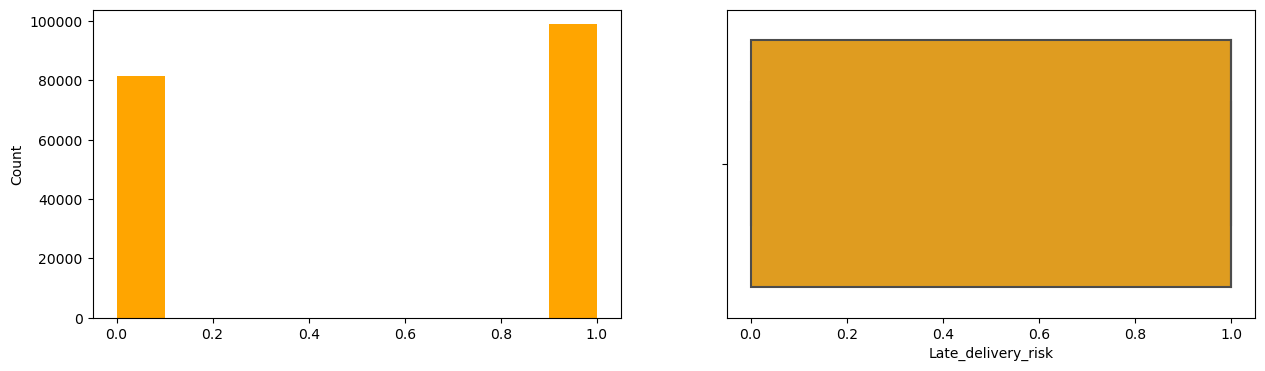

Customer_Zipcode
Skew: 0.49


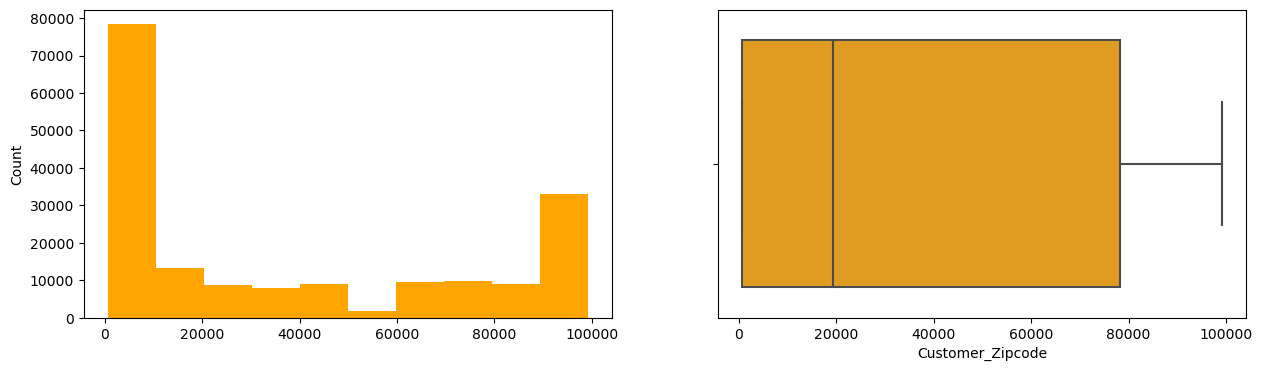

Latitude
Skew: -0.1


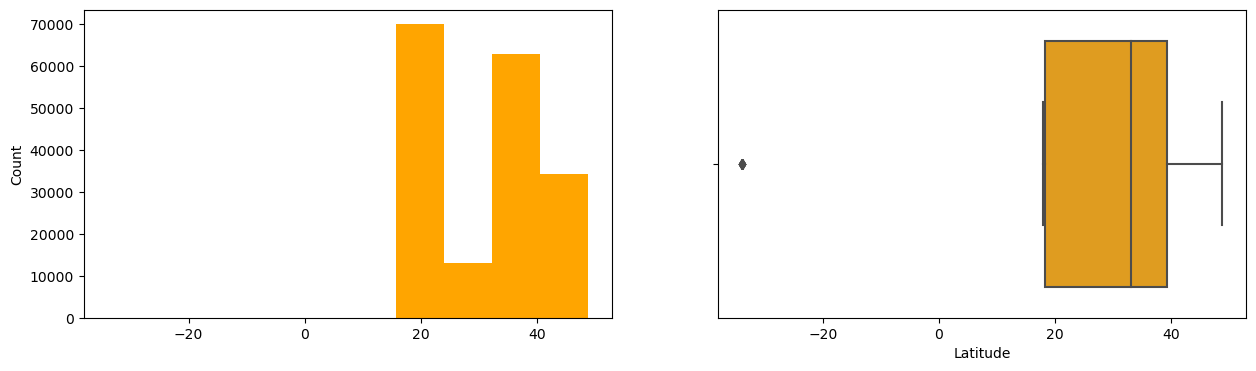

Longitude
Skew: -0.5


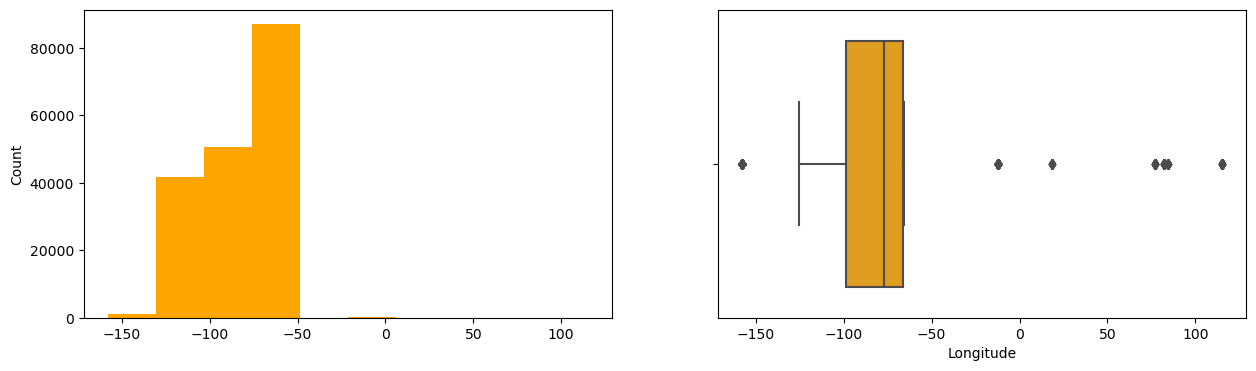

Order_Item_Discount
Skew: 3.04


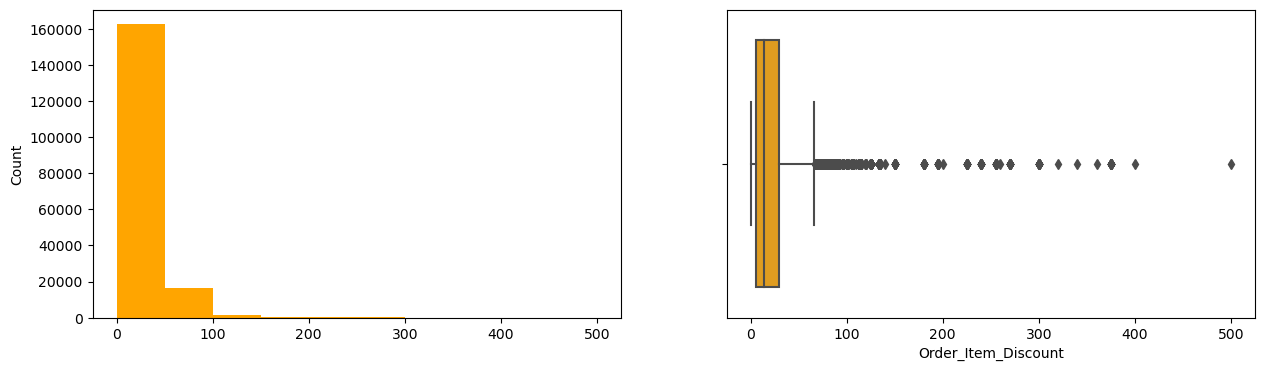

Order_Item_Discount_Rate
Skew: 0.34


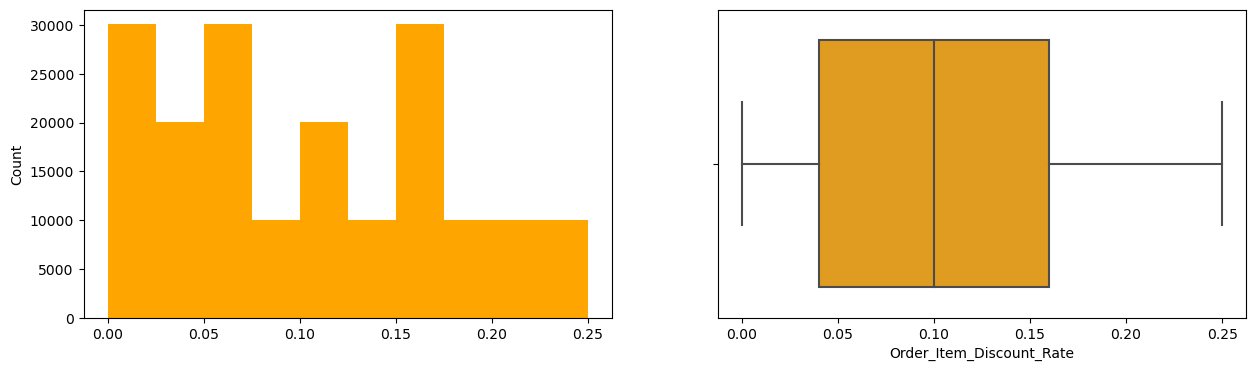

Order_Item_Profit_Ratio
Skew: -2.89


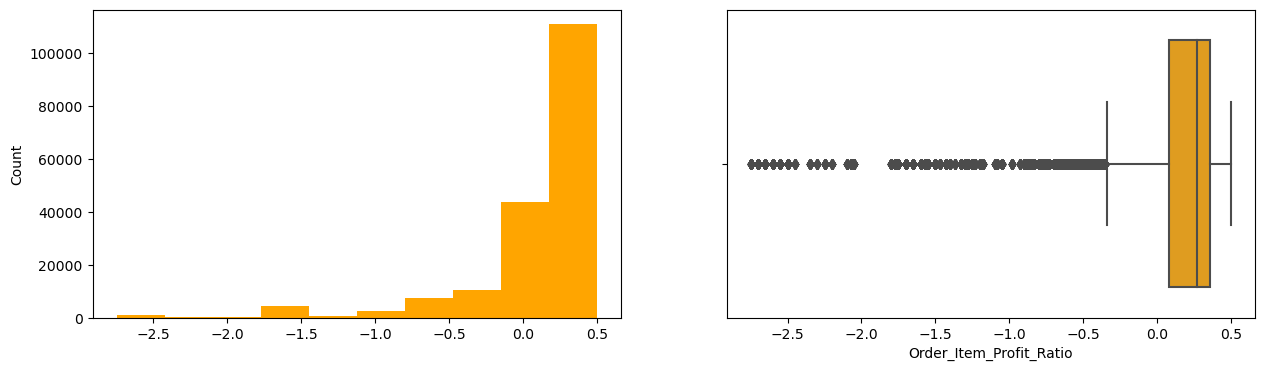

Order_Item_Quantity
Skew: 0.88


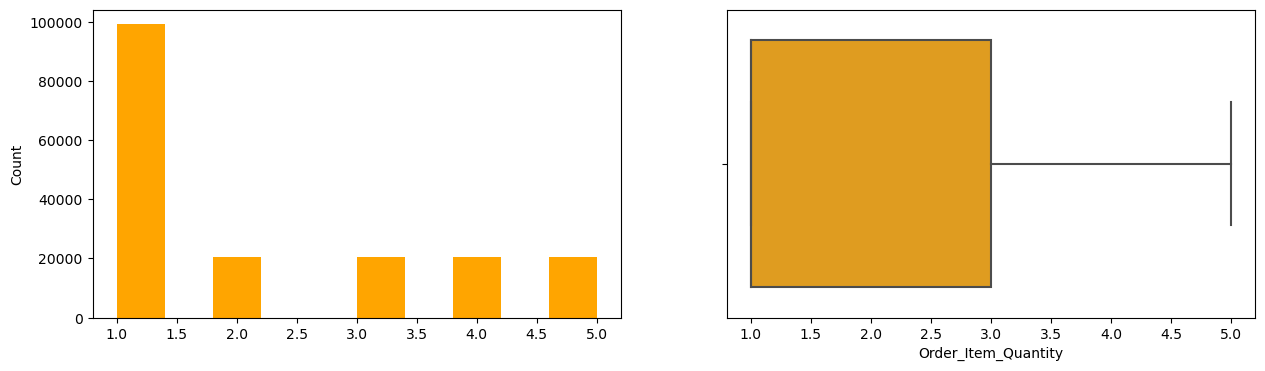

Sales
Skew: 2.88


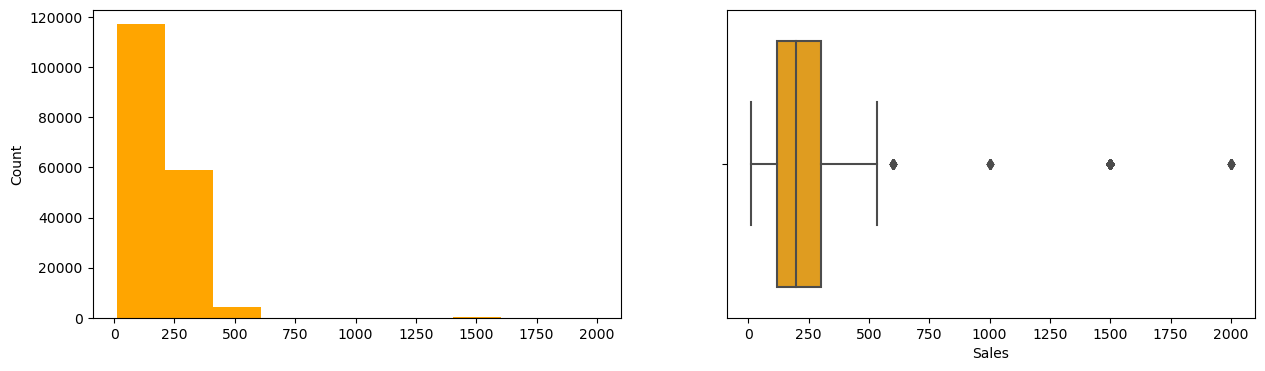

Order_Item_Total
Skew: 2.89


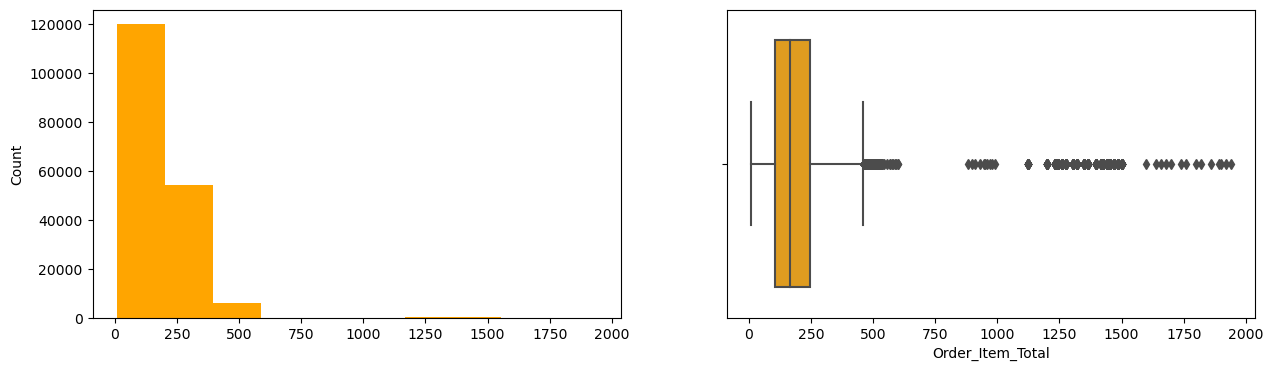

In [77]:
# Checking the Ditribution and Skewness

for col in num_cols:
    print(col)
    print('Skew:', round(df[col].skew(), 2))
    plt.figure(figsize=(15, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color='orange')  # Set color to orange
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='orange')  # Set color to orange
    plt.show()

In [68]:
print(cat_cols)

Index(['Type', 'Category_Name', 'Customer_City', 'Customer_Country',
       'Customer_Segment', 'Customer_State', 'Department_Name', 'Market',
       'Order_City', 'Order_Country', 'Order_Region', 'Order_State',
       'Order_Status', 'Product_Name', 'Shipping_Mode'],
      dtype='object')


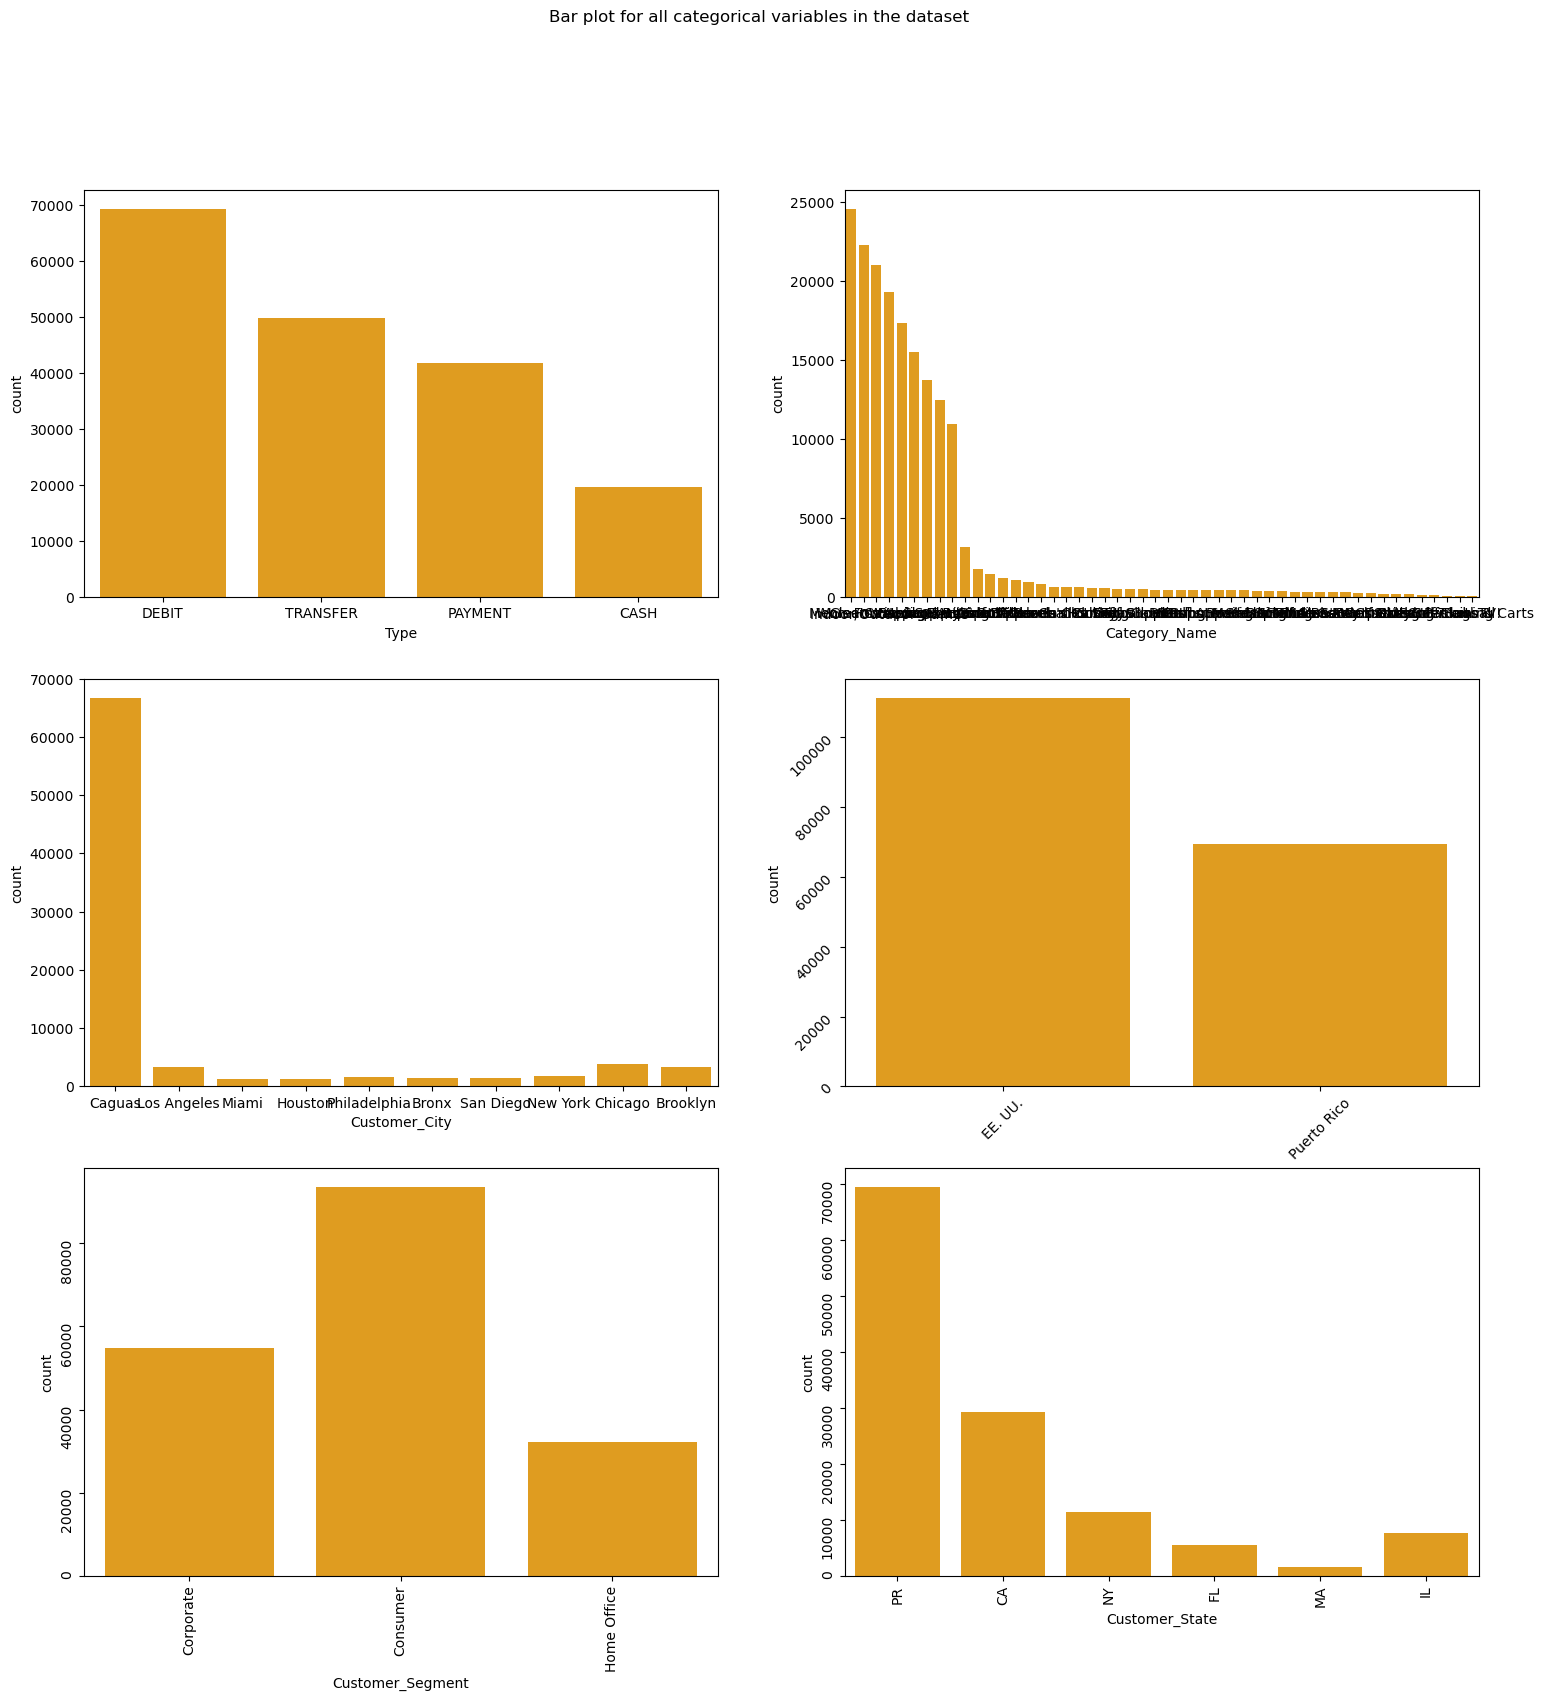

In [76]:
#Distribution of Categorical Variables
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax=axes[0, 0], x='Type', data=df, color='orange', order=df['Type'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='Category_Name', data=df, color='orange', order=df['Category_Name'].value_counts().index)
top_10_customer_cities = df['Customer_City'].value_counts().head(10).index
df_top_10_cities = df[df['Customer_City'].isin(top_10_customer_cities)]

sns.countplot(ax=axes[1, 0], x='Customer_City', data=df_top_10_cities, color='orange')
axes[1, 0].set_ylim(0, 70000)
sns.countplot(ax=axes[1, 1], x='Customer_Country', data=df, color='orange', order=df['Customer_Country'].value_counts().index)
sns.countplot(ax=axes[2, 0], x='Customer_Segment', data=df, color='orange', order=df['Customer_Segment'].head(20).value_counts().index)
sns.countplot(ax=axes[2, 1], x='Customer_State', data=df, color='orange', order=df['Customer_State'].head(20).value_counts().index)

axes[1][1].tick_params(labelrotation=45)
axes[2][0].tick_params(labelrotation=90)
axes[2][1].tick_params(labelrotation=90)

plt.show()


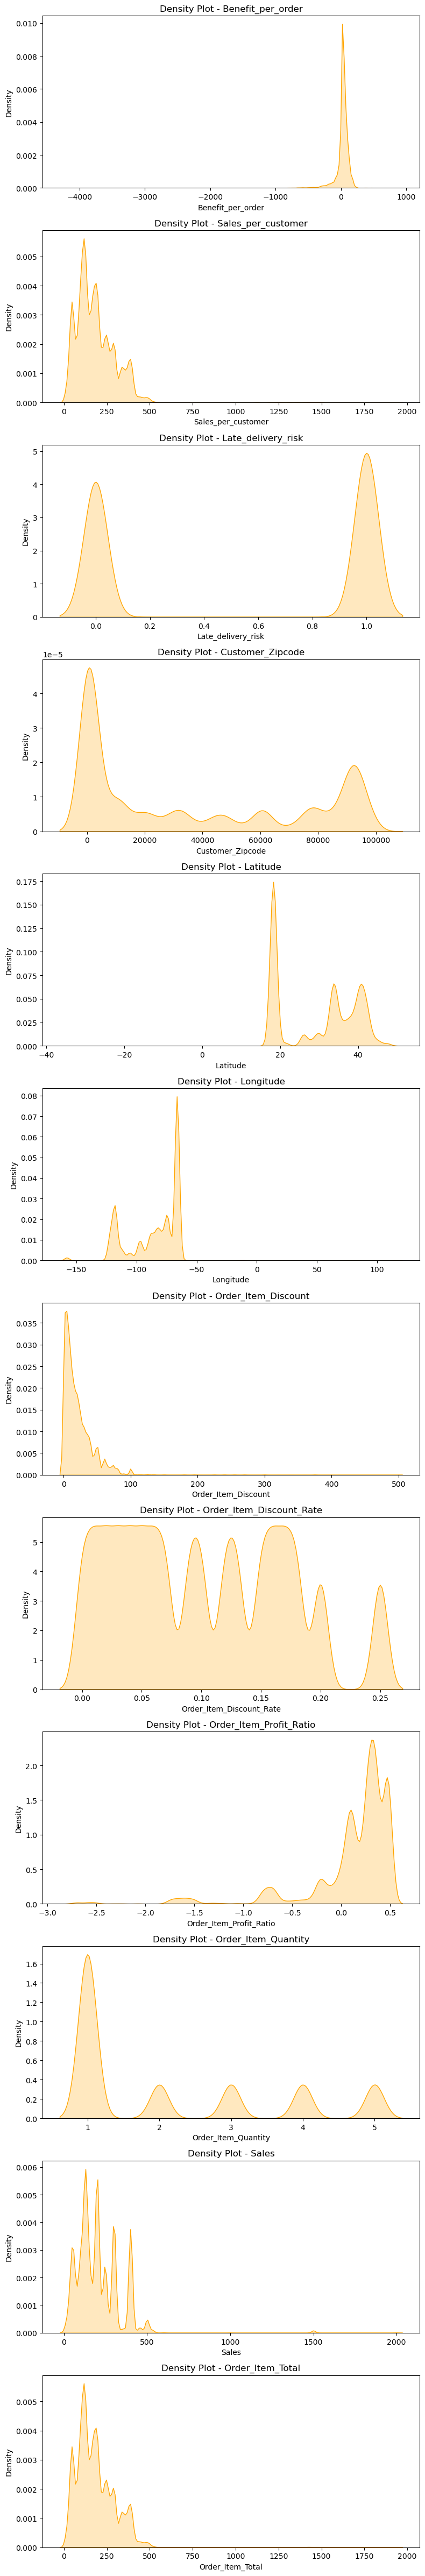

In [75]:
# Set up subplots
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, len(num_cols) * 4))

# Plot density plots for each numerical column
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df[col], color='orange', shade=True, ax=axes[i])
    axes[i].set_title(f'Density Plot - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [82]:
df['Benefit_per_order_transformed'] = np.log(df['Benefit_per_order'])

Benefit_per_order
Skew : -4.74


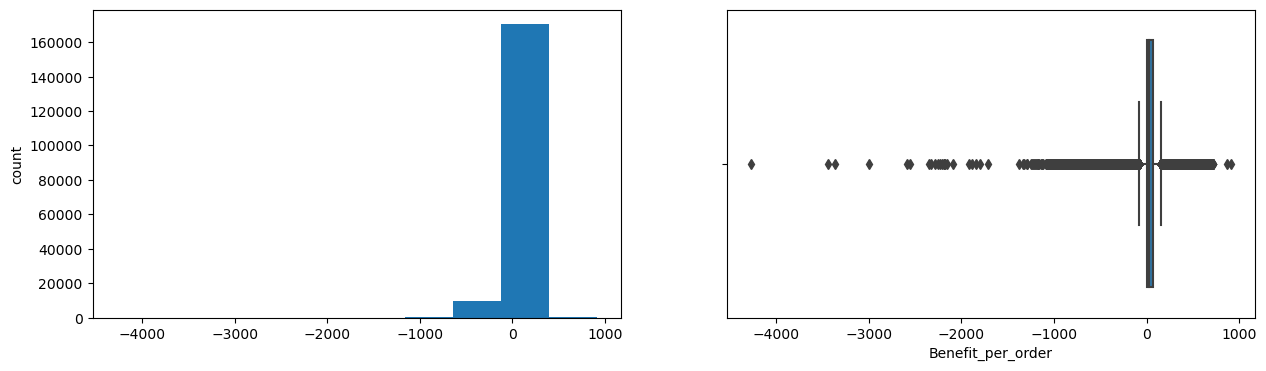

Sales_per_customer
Skew : 2.89


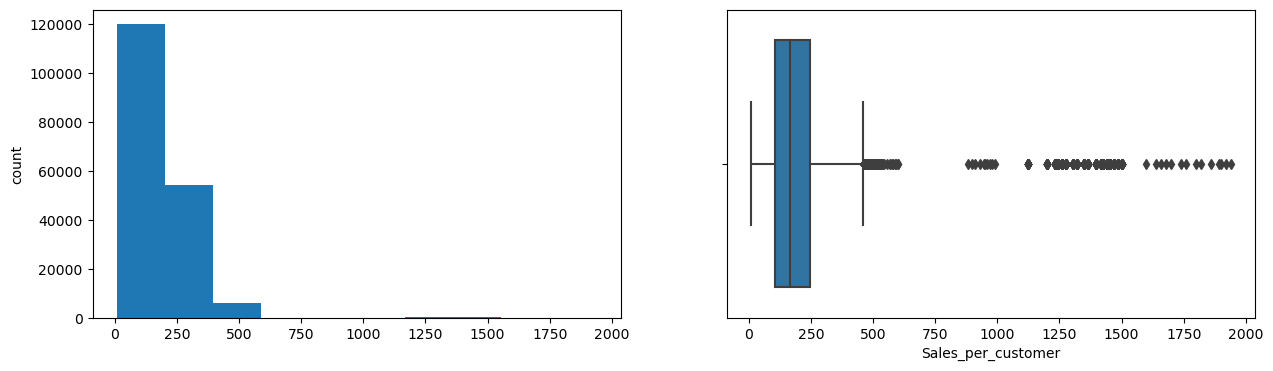

Late_delivery_risk
Skew : -0.19


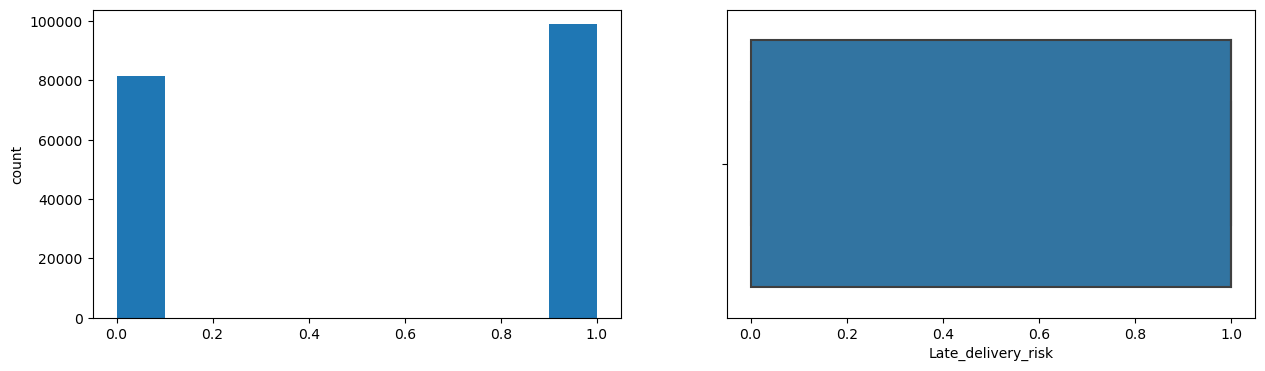

Customer_Zipcode
Skew : 0.49


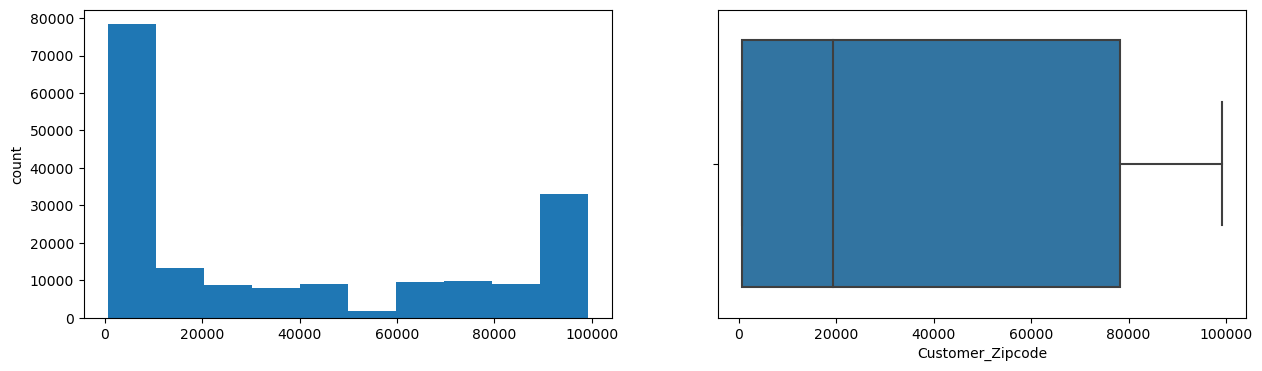

Latitude
Skew : -0.1


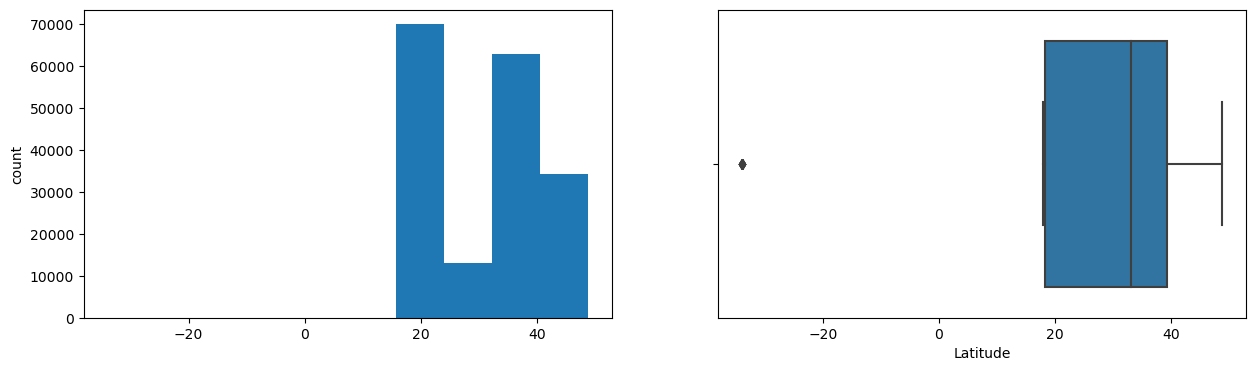

Longitude
Skew : -0.5


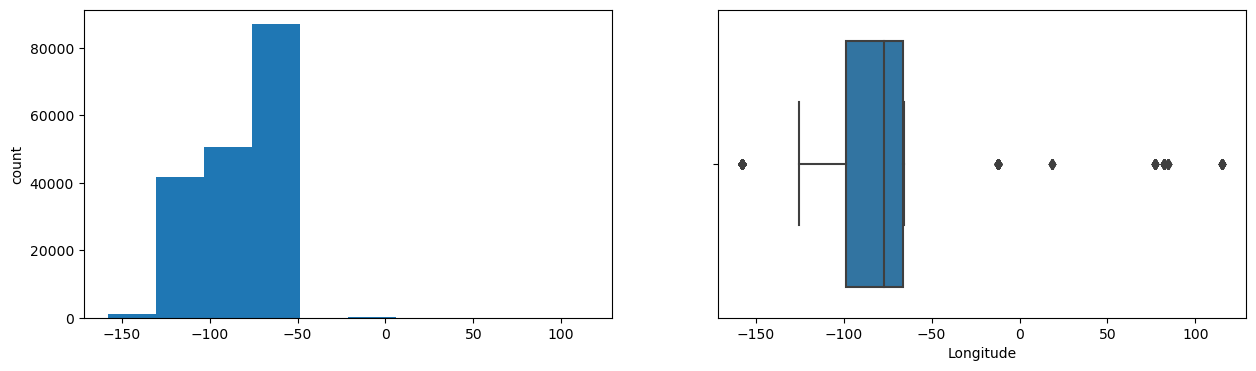

Order_Item_Discount
Skew : 3.04


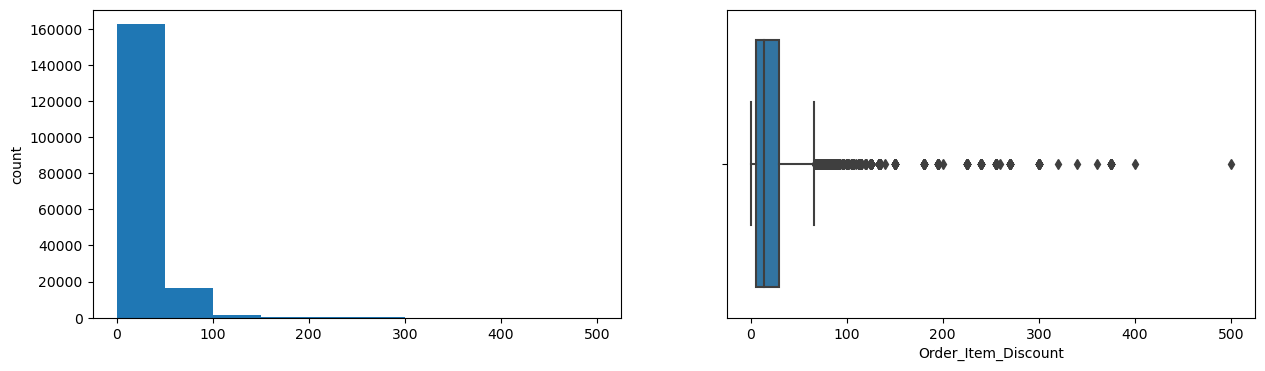

Order_Item_Discount_Rate
Skew : 0.34


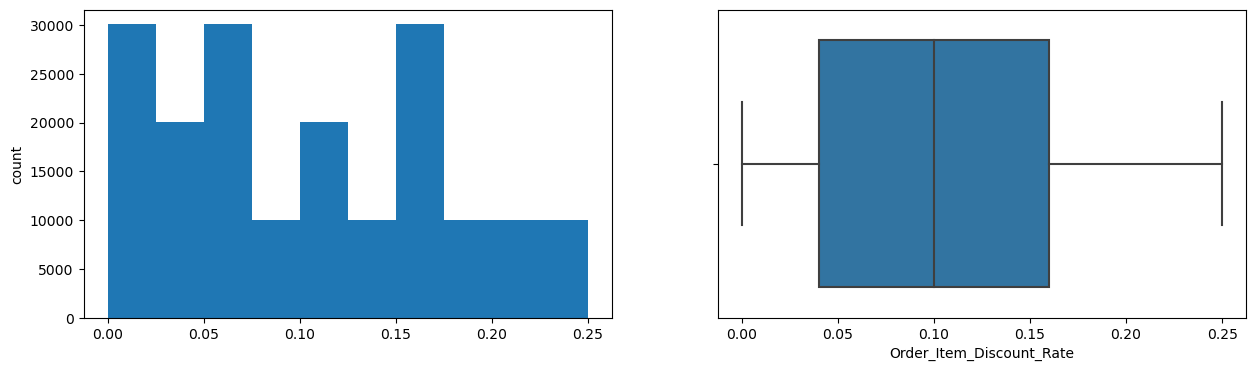

Order_Item_Profit_Ratio
Skew : -2.89


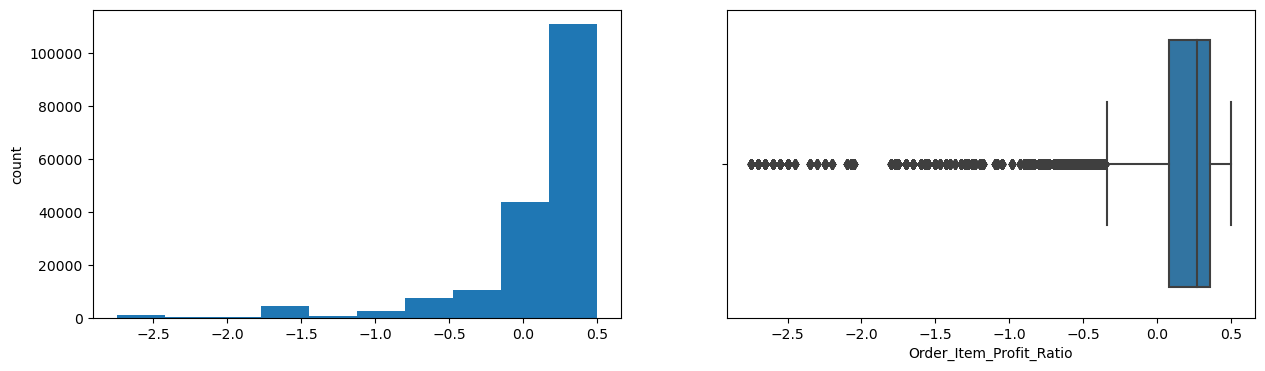

Order_Item_Quantity
Skew : 0.88


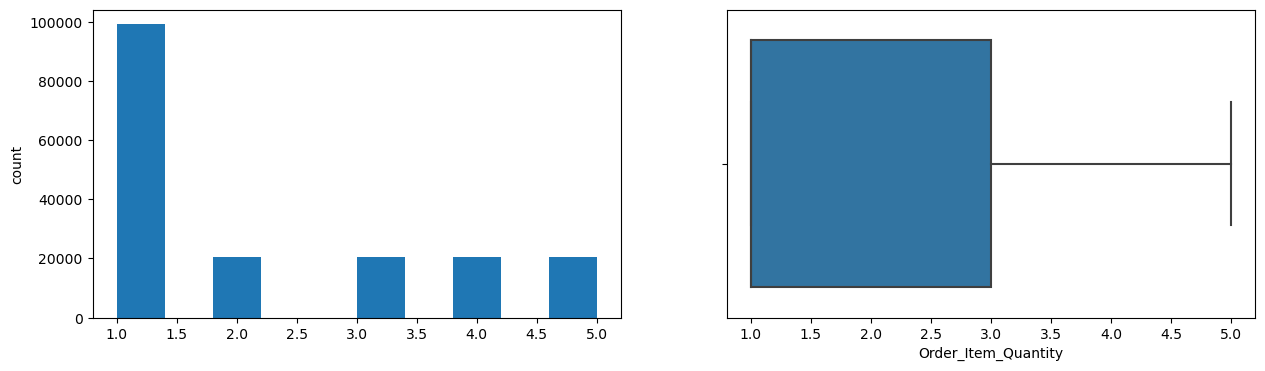

Sales
Skew : 2.88


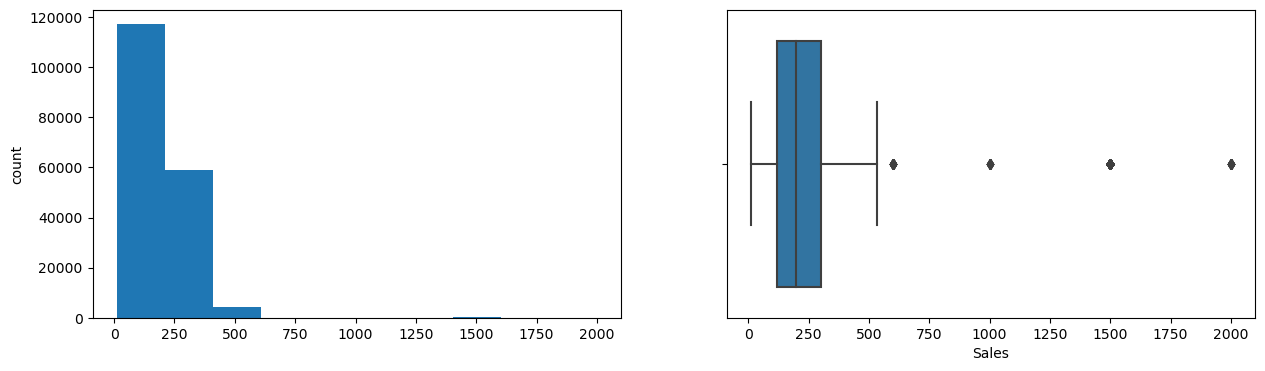

Order_Item_Total
Skew : 2.89


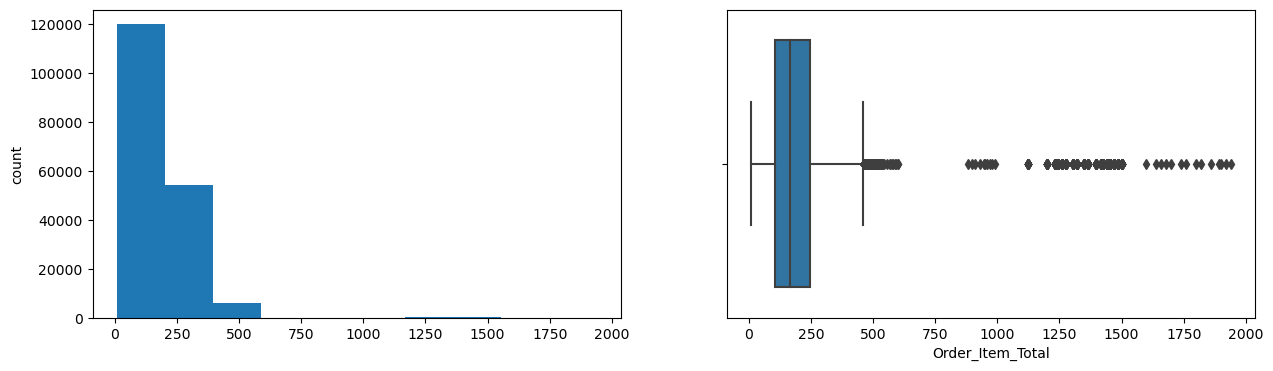

In [83]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### Performing Box-Cox transformation & Log transformation on Skewed variables

In [78]:
# Define the columns with skewness to address
columns_to_transform = [
    'Benefit_per_order', 'Sales_per_customer', 'Order_Item_Discount', 'Sales',
    'Order_Item_Total', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity'
]

# Apply transformations to each column
for column in columns_to_transform:
    # Adding a shift to handle zero and negative values
    shift = abs(df[column].min()) + 1  # Adding 1 to avoid zero values
    df[column] = df[column] + shift
    
    # Check if the column is highly skewed (you can adjust the threshold)
    if abs(df[column].skew()) > 1:
        # Apply Box-Cox transformation with shift for highly skewed columns
        df[column], _ = stats.boxcox(df[column])
    else:
        # Apply log transformation with shift for moderately skewed columns
        df[column] = np.log(df[column])

# Check for and handle any remaining missing values (replace with 0 or another suitable value)
df.fillna(0, inplace=True)


In [79]:
# Rechecking the skewness after trans
skewness_values = {}
for column in columns_to_transform:
    skewness = df[column].skew()
    skewness_values[column] = skewness

# Display skewness values
for column, skewness in skewness_values.items():
    print(f"Skewness - {column}: {skewness}")

Skewness - Benefit_per_order: 1.1514187017935333
Skewness - Sales_per_customer: 0.009258765492869718
Skewness - Order_Item_Discount: -0.04168252449129615
Skewness - Sales: 0.009555482116959736
Skewness - Order_Item_Total: 0.009258765492869718
Skewness - Order_Item_Profit_Ratio: -0.5400175386209374
Skewness - Order_Item_Quantity: 0.6818115656158159


### Identifying Outliers

In [80]:
from scipy.stats import zscore

# Select the numeric columns for which you want to calculate Z-scores
numeric_columns = ['Benefit_per_order', 'Sales_per_customer',
                   'Latitude', 'Longitude', 'Order_Item_Discount',
                   'Order_Item_Discount_Rate', 'Order_Item_Profit_Ratio', 'Order_Item_Quantity',
                   'Sales', 'Order_Item_Total']

# Calculate Z-scores for the selected columns
zscore_df = df[numeric_columns].apply(zscore)

# Define a Z-score threshold (e.g., 2 or -2 for a two-tailed test)
zscore_threshold = 2
zscore_threshold_less =-2

# Identify rows where Z-scores exceed the threshold (potential outliers)
outliers_df = df[(np.abs(zscore_df) > zscore_threshold).any(axis=1)]
above_threshold_count = (zscore_df > zscore_threshold).sum().sum()
below_threshold_count = (zscore_df < -zscore_threshold).sum().sum()

print(f"Number of outliers above {zscore_threshold}: {above_threshold_count}")
print(f"Number of outliers below -{zscore_threshold}: {below_threshold_count}")
print(zscore_df)

Number of outliers above 2: 18743
Number of outliers below -2: 27422
        Benefit_per_order  Sales_per_customer  Latitude  Longitude  \
0                0.767959            1.162086 -1.168610   0.880795   
1               -2.531970            1.142520 -1.165758   0.880794   
2               -2.523372            1.132681  0.771612  -1.724824   
3               -0.098780            1.102995  0.448973  -1.557307   
4                1.378341            1.062784 -1.168375   0.880795   
...                   ...                 ...       ...        ...   
180514           0.107022            1.625627  1.112838   0.511927   
180515          -4.150519            1.605609  0.574980  -1.591260   
180516           1.481470            1.585442  1.213619   0.557445   
180517           2.192631            1.565124 -1.172493   0.865233   
180518           1.912572            1.544651 -1.164644   0.865231   

        Order_Item_Discount  Order_Item_Discount_Rate  \
0                 -0.034002      

In [83]:
#Dropping outliers from the Dataframe
cleaned_df=df.drop(outliers_df.index)

### EDA Bivariate Analysis

In [84]:
type(cleaned_df['Category_Name'])

pandas.core.series.Series

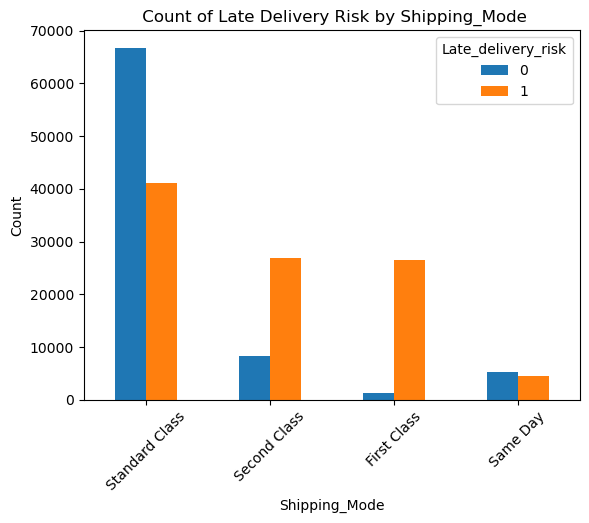

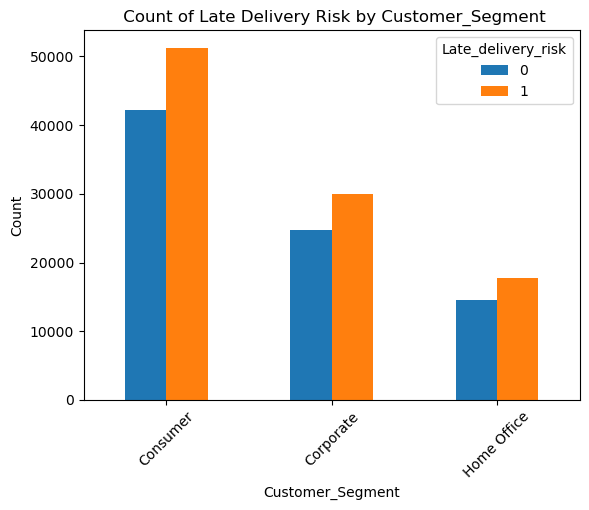

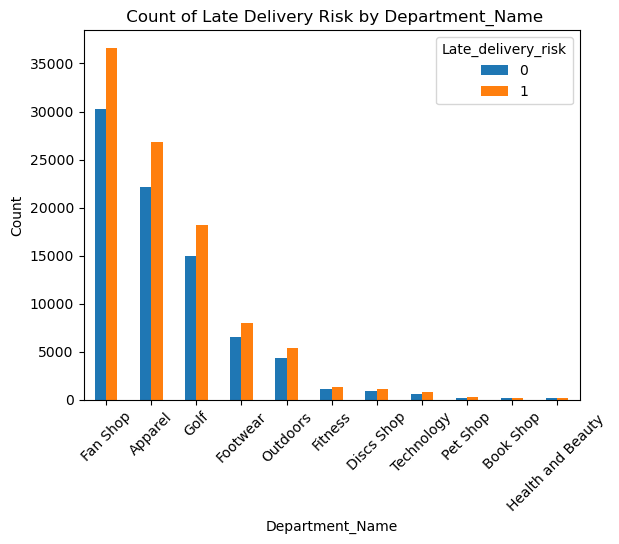

In [85]:
# Assuming df is your DataFrame
# df = pd.read_csv('your_file.csv') # Uncomment and modify if you need to load data from a file

# List of columns to analyze
columns_to_analyze = ['Shipping_Mode', 'Customer_Segment', 'Department_Name']

# Loop through each column and create a bar plot
for column in columns_to_analyze:
    # Group by the current column and 'Late_delivery_risk', then count
    grouped = df.groupby([column, 'Late_delivery_risk']).size().unstack()

    # Calculate the total counts for each category in the column
    grouped['Total'] = grouped.sum(axis=1)

    # Sort the DataFrame based on the total counts in descending order
    sorted_grouped = grouped.sort_values(by='Total', ascending=False)

    # Drop the total column as it's no longer needed for plotting
    sorted_grouped = sorted_grouped.drop(columns='Total')

    # Plotting
    sorted_grouped.plot(kind='bar', stacked=False)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f' Count of Late Delivery Risk by {column}')
    plt.xticks(rotation=45)
    plt.show()


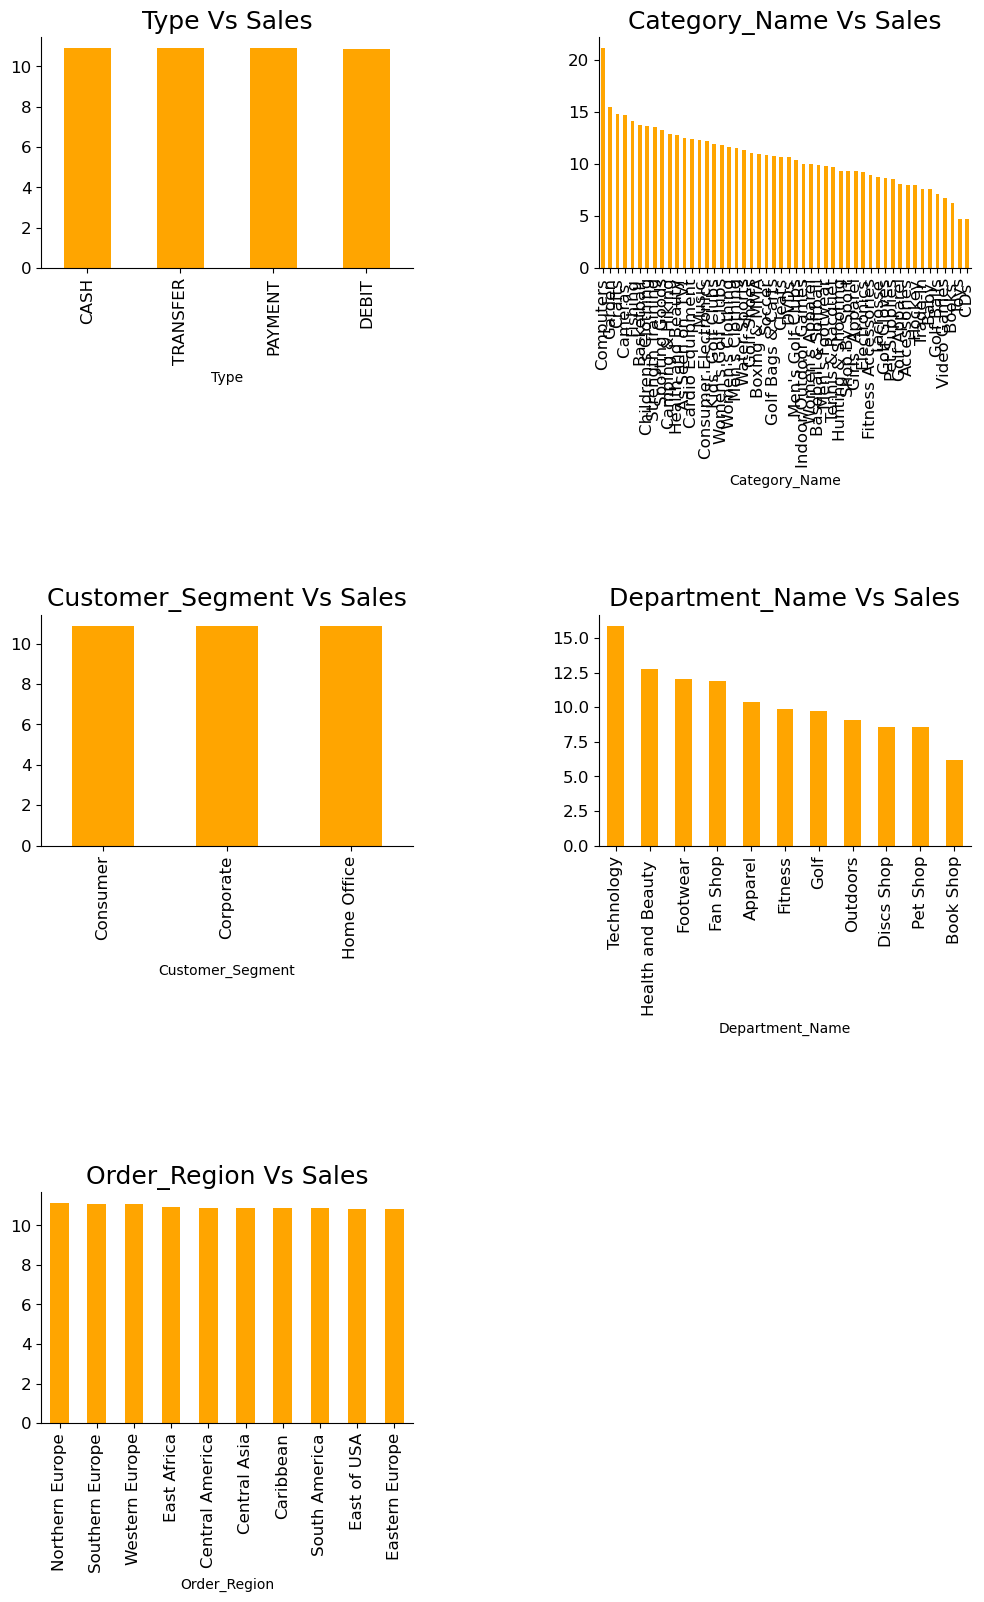

In [96]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))

df.groupby('Type')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12, color='orange')
axarr[0][0].set_title("Type Vs Sales", fontsize=18)

df.groupby('Category_Name')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12, color='orange')
axarr[0][1].set_title("Category_Name Vs Sales", fontsize=18)

df.groupby('Customer_Segment')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12, color='orange')
axarr[1][0].set_title("Customer_Segment Vs Sales", fontsize=18)

df.groupby('Department_Name')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12, color='orange')
axarr[1][1].set_title("Department_Name Vs Sales", fontsize=18)

df.groupby('Order_Region')['Sales'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12, color='orange')
axarr[2][0].set_title("Order_Region Vs Sales", fontsize=18)

# Remove the empty subplot by not utilizing it
plt.delaxes(axarr[2][1])

plt.subplots_adjust(hspace=1.5)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.show()


### EDA Multi variate analysis

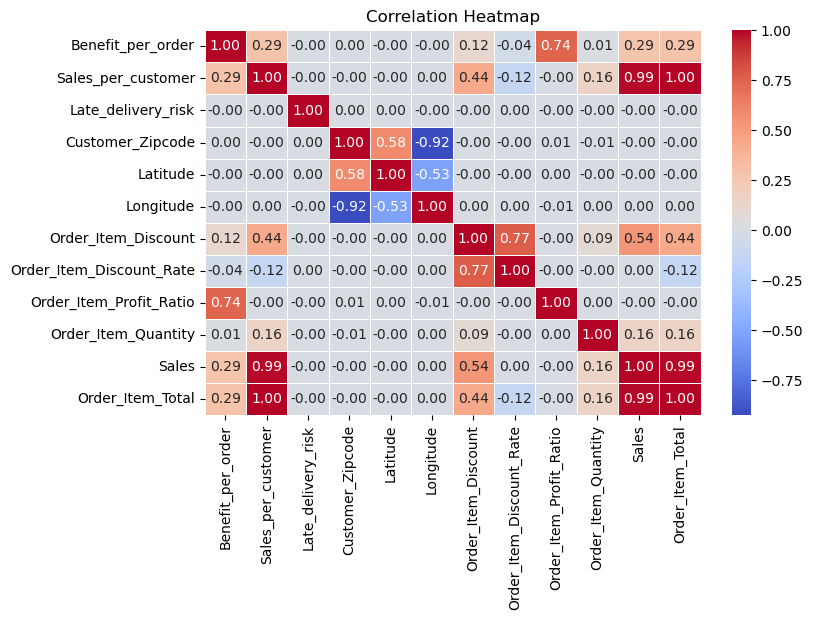

In [97]:
#correlation between numerical variables

correlation_matrix = df.corr()
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## FEATURE ENGINEERING

### Encoding

#### Onehot encoding

In [98]:
onehot_encoded_df = pd.get_dummies(cleaned_df[['Type','Market','Customer_Segment','Shipping_Mode','Customer_Country','Order_Status']],columns=['Type','Market','Customer_Segment','Shipping_Mode','Customer_Country','Order_Status'])

In [99]:
onehot_encoded_df.head()

,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Customer_Segment_Consumer,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_EE. UU.,Customer_Country_Puerto Rico,Order_Status_CANCELED,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD
0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [100]:
cleaned_df=pd.concat([onehot_encoded_df,cleaned_df],axis='columns')
# cleaned_df = copy.deepcopy(onehot_encoded_df)

In [101]:
type(cleaned_df['Type'])

pandas.core.series.Series

In [102]:
cleaned_df_copy = copy.deepcopy(cleaned_df)

In [103]:
sorted(list(cleaned_df.columns))

['Benefit_per_order',
 'Category_Name',
 'Customer_City',
 'Customer_Country',
 'Customer_Country_EE. UU.',
 'Customer_Country_Puerto Rico',
 'Customer_Segment',
 'Customer_Segment_Consumer',
 'Customer_Segment_Corporate',
 'Customer_Segment_Home Office',
 'Customer_State',
 'Customer_Zipcode',
 'Department_Name',
 'Late_delivery_risk',
 'Latitude',
 'Longitude',
 'Market',
 'Market_Africa',
 'Market_Europe',
 'Market_LATAM',
 'Market_Pacific Asia',
 'Market_USCA',
 'Order_City',
 'Order_Country',
 'Order_Item_Discount',
 'Order_Item_Discount_Rate',
 'Order_Item_Profit_Ratio',
 'Order_Item_Quantity',
 'Order_Item_Total',
 'Order_Region',
 'Order_State',
 'Order_Status',
 'Order_Status_CANCELED',
 'Order_Status_CLOSED',
 'Order_Status_COMPLETE',
 'Order_Status_ON_HOLD',
 'Order_Status_PAYMENT_REVIEW',
 'Order_Status_PENDING',
 'Order_Status_PENDING_PAYMENT',
 'Order_Status_PROCESSING',
 'Order_Status_SUSPECTED_FRAUD',
 'Product_Name',
 'Sales',
 'Sales_per_customer',
 'Shipping_Mode',
 

In [104]:
cleaned_df.head()

,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Customer_Segment_Consumer,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_First Class,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_EE. UU.,Customer_Country_Puerto Rico,Order_Status_CANCELED,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Type,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name,Customer_City,Customer_Country,Customer_Segment,Customer_State,Customer_Zipcode,Department_Name,Latitude,Longitude,Market,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region,Order_State,Order_Status,Product_Name,Shipping_Mode
0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,DEBIT,2.304426e+35,13.022081,0,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,Southeast Asia,Java Occidental,COMPLETE,Smart watch,Standard Class
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,DEBIT,1.968295e+35,12.890577,0,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,Oceania,Queensland,COMPLETE,Smart watch,Standard Class
4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,PAYMENT,2.541139e+35,12.801090,0,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,Oceania,Queensland,PENDING_PAYMENT,Smart watch,Standard Class
5,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,TRANSFER,1.948807e+35,12.755947,0,Sporting Goods,Tonawanda,EE. UU.,Consumer,NY,14150.0,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,Oceania,Queensland,CANCELED,Smart watch,Standard Class
6,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,DEBIT,2.325224e+35,12.664275,1,Sporting Goods,Caguas,Puerto Rico,Home Office,PR,725.0,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,Eastern Asia,Guangdong,COMPLETE,Smart watch,First Class


In [105]:
cleaned_df.drop(['Type','Market','Market_Pacific Asia','Customer_Segment','Shipping_Mode','Customer_Country','Order_Status','Type_CASH','Customer_Segment_Consumer','Shipping_Mode_First Class','Customer_Country_EE. UU.','Order_Status_CANCELED'],axis='columns',inplace=True)

In [106]:
type(cleaned_df['Category_Name'])

pandas.core.series.Series

### Binary encoding

In [107]:
!pip install category-encoders
import category_encoders as ce

In [108]:
cleaned_df[['Category_Name', 'Customer_State', 'Department_Name', 'Order_Region']].nunique()

Category_Name      45
Customer_State     44
Department_Name    10
Order_Region       23
dtype: int64

In [109]:
binary_encoding=['Category_Name', 'Customer_State', 'Department_Name', 'Order_Region']
encoder = ce.BinaryEncoder(cols=binary_encoding)


In [110]:
binary_encoded=encoder.fit_transform(cleaned_df)
binary_encoded
cleaned_df=binary_encoded


In [111]:
cleaned_df

,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,Bekasi,Indonesia,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,Java Occidental,Smart watch
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,Los Angeles,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,Townsville,Australia,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,Queensland,Smart watch
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,Townsville,Australia,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,Queensland,Smart watch
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,Tonawanda,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,Toowoomba,Australia,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,Queensland,Smart watch
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,Guangzhou,China,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,Guangdong,Smart watch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180511,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2.677992e+35,13.195833,0,0,1,1,1,1,0,Chula Vista,0,0,0,0,1,0,91911.0,0,1,1,0,32.611141,-117.073662,Chengdu,China,6.744862,0.18,7294.280101,1.098612,14.107473,13.195833,0,0,0,1,1,Sichuan,Field & Stream Sportsman 16 Gun Fire Safe
180512,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,2.278990e+35,13.092267,1,0,1,1,1,1,0,Caguas,0,0,0,0,0,1,725.0,0,1,1,0,18.245256,-66.370621,Chengdu,China,6.989579,0.20,4960.741451,1.098612,14.107473,13.092267,0,0,0,1,1,Sichuan,Field & Stream Sportsman 16 Gun Fire Safe
180514,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,2.048107e+35,14.053655,0,0,1,1,1,1,0,Brooklyn,0,0,0,0,1,1,11207.0,0,1,1,0,40.640930,-73.942711,Shanghái,China,0.000000,0.00,3576.562891,1.098612,14.107473,14.053655,0,0,0,1,1,Shanghái,Field & Stream Sportsman 16 Gun Fire Safe
180516,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2.581134e+35,13.964226,1,0,1,1,1,1,0,Bristol,0,1,1,0,1,1,6010.0,0,1,1,0,41.629959,-72.967155,Adelaide,Australia,2.749738,0.02,5866.126224,1.098612,14.107473,13.964226,0,0,0,1,0,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe


In [112]:
cleaned_df[['Late_delivery_risk','Category_Name_0','Category_Name_1','Category_Name_2','Category_Name_3','Category_Name_4','Category_Name_5']].sample(5)

,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5
72743,0,1,0,1,1,0,0
131509,0,1,0,1,1,0,1
142161,0,0,0,1,1,0,1
71120,1,0,0,1,0,1,1
101107,0,1,0,1,1,0,1


### Bayesian mean encoding

In [113]:
cleaned_df.head()


,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,Bekasi,Indonesia,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,Java Occidental,Smart watch
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,Los Angeles,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,Townsville,Australia,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,Queensland,Smart watch
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,Townsville,Australia,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,Queensland,Smart watch
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,Tonawanda,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,Toowoomba,Australia,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,Queensland,Smart watch
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,Guangzhou,China,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,Guangdong,Smart watch


In [114]:
target_column= ['Late_delivery_risk']
Bayseian_column= ['Customer_City', 'Order_City', 'Order_Country', 'Order_State']


In [115]:
global_mean = df[target_column].mean()

In [116]:
cleaned_df['Customer_City'].nunique()

559

In [117]:
cleaned_df.head()

,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,Bekasi,Indonesia,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,Java Occidental,Smart watch
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,Los Angeles,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,Townsville,Australia,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,Queensland,Smart watch
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,Townsville,Australia,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,Queensland,Smart watch
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,Tonawanda,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,Toowoomba,Australia,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,Queensland,Smart watch
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,Caguas,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,Guangzhou,China,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,Guangdong,Smart watch


In [118]:

# Define the target column and Bayesian columns
target_column = ['Late_delivery_risk']
Bayesian_columns = ['Customer_City', 'Order_City', 'Order_Country', 'Order_State']

def bayesian_mean_encoding(dataframe, categorical_columns, target_column):
    overall_mean = dataframe[target_column].mean()

    for column in categorical_columns:
        # Calculate the number of occurrences and the mean of the target for each category
        counts = dataframe.groupby(column)[target_column].count()
        means = dataframe.groupby(column)[target_column].mean()

        # Calculate the smooth mean
        smooth = (counts * means + overall_mean) / (counts + 1)

        # Replace original column with encoded values
        dataframe[column] = dataframe[column].map(smooth)

# Assuming cleaned_df is your DataFrame
# cleaned_df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line if you need to load your data

# Target column and Bayesian columns
target_column = 'Late_delivery_risk'
Bayesian_columns = ['Customer_City', 'Order_City', 'Order_Country', 'Order_State']

# Applying the Bayesian mean encoding directly in cleaned_df
bayesian_mean_encoding(cleaned_df, Bayesian_columns, target_column)

# Display the first few rows of the modified cleaned_df
cleaned_df.head()

,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,0.546110,0.552988,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,0.573397,Smart watch
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,0.539044,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,0.375518,0.542643,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,0.562139,Smart watch
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,0.375518,0.542643,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,0.562139,Smart watch
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,0.617136,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,0.516123,0.542643,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,0.562139,Smart watch
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,0.595845,0.541874,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,0.564116,Smart watch


In [119]:
cleaned_df.head()

,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,0.546110,0.552988,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,0.573397,Smart watch
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,0.539044,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,0.375518,0.542643,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,0.562139,Smart watch
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,0.375518,0.542643,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,0.562139,Smart watch
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,0.617136,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,0.516123,0.542643,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,0.562139,Smart watch
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,0.595845,0.541874,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,0.564116,Smart watch


In [120]:
cleaned_df['Product_Name'].unique()

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Nike Men's Free 5.0+ Running Shoe",
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera',
       'Elevation Training Mask 2.0',
       "adidas Men's Germany Black Crest Away Tee",
       'Glove It Urban Brick Golf Towel',
       'Team Go

### Frequency encoding

In [121]:
frequency = cleaned_df['Product_Name'].value_counts(normalize=True)

# Create a mapping from Product Name to frequency
frequency_map = frequency.to_dict()

# Replace Product Names with their frequencies
cleaned_df['Product_Name'] = cleaned_df['Product_Name'].map(frequency_map)

In [122]:
cleaned_df

,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Market_Africa,Market_Europe,Market_LATAM,Market_USCA,Customer_Segment_Corporate,Customer_Segment_Home Office,Shipping_Mode_Same Day,Shipping_Mode_Second Class,Shipping_Mode_Standard Class,Customer_Country_Puerto Rico,Order_Status_CLOSED,Order_Status_COMPLETE,Order_Status_ON_HOLD,Order_Status_PAYMENT_REVIEW,Order_Status_PENDING,Order_Status_PENDING_PAYMENT,Order_Status_PROCESSING,Order_Status_SUSPECTED_FRAUD,Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Name_0,Category_Name_1,Category_Name_2,Category_Name_3,Category_Name_4,Category_Name_5,Customer_City,Customer_State_0,Customer_State_1,Customer_State_2,Customer_State_3,Customer_State_4,Customer_State_5,Customer_Zipcode,Department_Name_0,Department_Name_1,Department_Name_2,Department_Name_3,Latitude,Longitude,Order_City,Order_Country,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Region_0,Order_Region_1,Order_Region_2,Order_Region_3,Order_Region_4,Order_State,Product_Name
0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,2.304426e+35,13.022081,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.251453,-66.037056,0.546110,0.552988,3.474719,0.04,5150.688999,1.098612,13.248505,13.022081,0,0,0,0,1,0.573397,0.001982
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1.968295e+35,12.890577,0,0,0,0,0,0,1,0.539044,0,0,0,0,1,0,90027.0,0,0,0,1,34.125946,-118.291016,0.375518,0.542643,4.413463,0.07,3438.266007,1.098612,13.248505,12.890577,0,0,0,1,0,0.562139,0.001982
4,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,2.541139e+35,12.801090,0,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.253769,-66.037048,0.375518,0.542643,4.877260,0.09,6911.603261,1.098612,13.248505,12.801090,0,0,0,1,0,0.562139,0.001982
5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.948807e+35,12.755947,0,0,0,0,0,0,1,0.617136,0,0,0,0,1,1,14150.0,0,0,0,1,43.013969,-78.879066,0.516123,0.542643,5.079610,0.10,3304.634183,1.098612,13.248505,12.755947,0,0,0,1,0,0.562139,0.001982
6,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,2.325224e+35,12.664275,1,0,0,0,0,0,1,0.546570,0,0,0,0,0,1,725.0,0,0,0,1,18.242538,-66.037056,0.595845,0.541874,5.440519,0.12,5549.601923,1.098612,13.248505,12.664275,0,0,0,1,1,0.564116,0.001982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180511,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2.677992e+35,13.195833,0,0,1,1,1,1,0,0.390302,0,0,0,0,1,0,91911.0,0,1,1,0,32.611141,-117.073662,0.483112,0.541874,6.744862,0.18,7294.280101,1.098612,14.107473,13.195833,0,0,0,1,1,0.487850,0.087985
180512,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,2.278990e+35,13.092267,1,0,1,1,1,1,0,0.546570,0,0,0,0,0,1,725.0,0,1,1,0,18.245256,-66.370621,0.483112,0.541874,6.989579,0.20,4960.741451,1.098612,14.107473,13.092267,0,0,0,1,1,0.487850,0.087985
180514,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,2.048107e+35,14.053655,0,0,1,1,1,1,0,0.527689,0,0,0,0,1,1,11207.0,0,1,1,0,40.640930,-73.942711,0.523912,0.541874,0.000000,0.00,3576.562891,1.098612,14.107473,14.053655,0,0,0,1,1,0.523912,0.087985
180516,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,2.581134e+35,13.964226,1,0,1,1,1,1,0,0.711939,0,1,1,0,1,1,6010.0,0,1,1,0,41.629959,-72.967155,0.510196,0.542643,2.749738,0.02,5866.126224,1.098612,14.107473,13.964226,0,0,0,1,0,0.524118,0.087985


Class Distribution (Percentage):
1    54.765405
0    45.234595
Name: Late_delivery_risk, dtype: float64


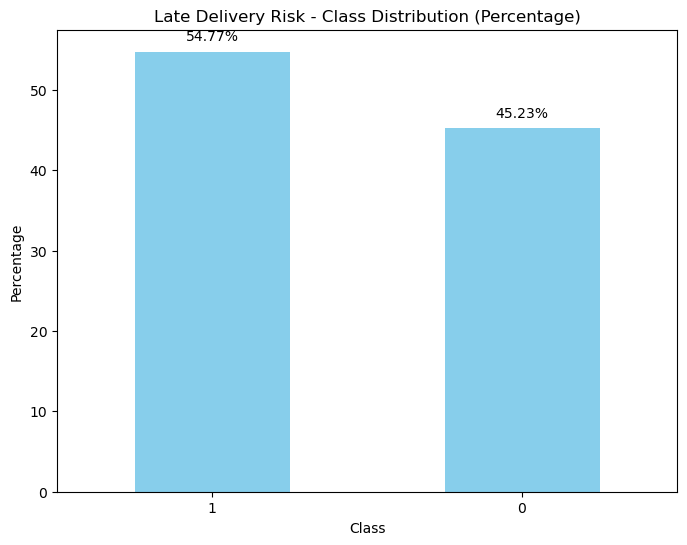

In [123]:

# 'Late_delivery_risk' is the target variable

# Calculate class distribution as percentages
class_distribution_percentage = cleaned_df['Late_delivery_risk'].value_counts(normalize=True) * 100

# Print the class distribution as percentages
print("Class Distribution (Percentage):")
print(class_distribution_percentage)

# Create a bar plot to visualize the class distribution as percentages
plt.figure(figsize=(8, 6))
ax = class_distribution_percentage.plot(kind='bar', color='skyblue')
plt.title('Late Delivery Risk - Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Label the bars with percentages
for i, v in enumerate(class_distribution_percentage):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

### Dealing with Imbalanced Target Variable

#### SMOTE

In [124]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with features and 'target' as the target variable

# Splitting the data into training and testing sets
X = cleaned_df.drop('Late_delivery_risk', axis=1)
y = cleaned_df['Late_delivery_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now, X_train_smote and y_train_smote are the training data to be used for model training


In [125]:

# Create a DataFrame from y_train_smote
y_train_smote_df = pd.Series(y_train_smote)

# Count the occurrences of each class
class_counts = y_train_smote_df.value_counts()

# Print the class proportions
print(class_counts)


0    66764
1    66764
Name: Late_delivery_risk, dtype: int64


### Identifying Important features for Model

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
# Create a Random Forest classifier
rf_classifer= RandomForestClassifier(random_state=42)

# Fit the model on your training data
rf_classifer.fit(X_train_smote, y_train_smote)

# Get feature importances
feature_importances=rf_classifer.feature_importances_

In [128]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [129]:
feature_importance_df

,Feature,Importance
11,Shipping_Mode_Standard Class,0.113779
43,Order_City,0.095729
41,Latitude,0.056967
56,Order_State,0.052387
42,Longitude,0.050545
21,Benefit_per_order,0.041159
29,Customer_City,0.037452
47,Order_Item_Profit_Ratio,0.036615
44,Order_Country,0.034794
45,Order_Item_Discount,0.034044


In [130]:
k = 10  # Replace with your desired number of features
selected_features = feature_importance_df['Feature'][:k]
threshold = 0.05  # Replace with your desired threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

In [131]:
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

In [132]:
selected_features

11    Shipping_Mode_Standard Class
43                      Order_City
41                        Latitude
56                     Order_State
42                       Longitude
Name: Feature, dtype: object

## Predictions of Test Data

#### Evaluate Model Performance:

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [134]:

def train_evaluate_model(classifier, param_grid, X_train, y_train, X_test, y_test):
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Extract best parameters, estimator and score
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Print best hyperparameters and estimator
    print(f"Best Hyperparameters for {type(classifier).__name__}: {best_params}")
    print(f"Best Estimator for {type(classifier).__name__}: {best_estimator}")
    print(f"Best Cross-Validation Score (Accuracy) for {type(classifier).__name__}: {best_score}")

    # Make predictions and evaluate
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Print performance metrics
    print(f"\nPerformance Metrics for {type(classifier).__name__}:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", confusion_mat)
    print("\n" + "-"*50 + "\n")
    
    return best_estimator,best_params,y_pred

In [135]:
!pip install xgboost

In [136]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [137]:
# Define parameter grids for both classifiers
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}



In [138]:
# Train and evaluate a random forest classifier, obtain best parameters and estimator, and make predictions on the test set

# Assuming X_train_selected, y_train_smote, X_test_selected, and y_test are already defined
rf_estimator, rf_params, rf_test_preds = train_evaluate_model(RandomForestClassifier(random_state=42), rf_param_grid, X_train_selected, y_train_smote, X_test_selected, y_test)


Best Hyperparameters for RandomForestClassifier: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator for RandomForestClassifier: RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)
Best Cross-Validation Score (Accuracy) for RandomForestClassifier: 0.8956618432672322

Performance Metrics for RandomForestClassifier:
Accuracy: 0.938053678062865
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     13785
           1       0.95      0.94      0.94     16693

    accuracy                           0.94     30478
   macro avg       0.94      0.94      0.94     30478
weighted avg       0.94      0.94      0.94     30478

Confusion Matrix:
 [[12942   843]
 [ 1045 15648]]

--------------------------------------------------



In [139]:
conf_matrix = confusion_matrix(y_test, rf_test_preds)

In [140]:
xgb_estimator, xgb_params, xgb_test_preds = train_evaluate_model(XGBClassifier(random_state=42), xgb_param_grid, X_train_selected, y_train_smote, X_test_selected, y_test)

Best Hyperparameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Best Estimator for XGBClassifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best Cross-Validation Score (Accuracy) for XGBClassifier: 0.8135218409988125

Performance Metrics for XGBClassifi

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

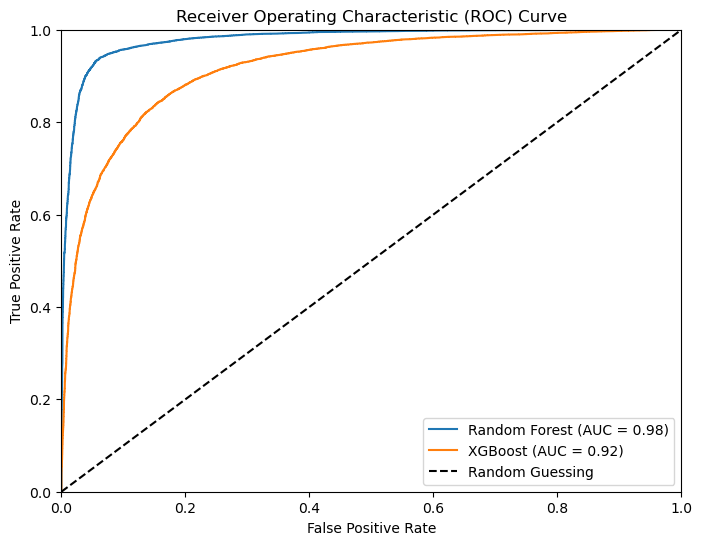

In [142]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(classifier, X_test, y_test, label):
    y_prob = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plt.figure(figsize=(8, 6))

# Plot ROC curves for both classifiers
plot_roc_curve(rf_estimator, X_test_selected, y_test, 'Random Forest')
plot_roc_curve(xgb_estimator, X_test_selected, y_test, 'XGBoost')

# Plot the diagonal (random guessing)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


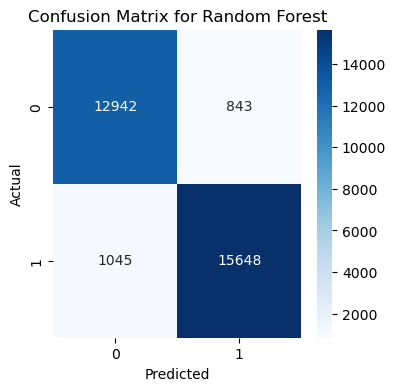

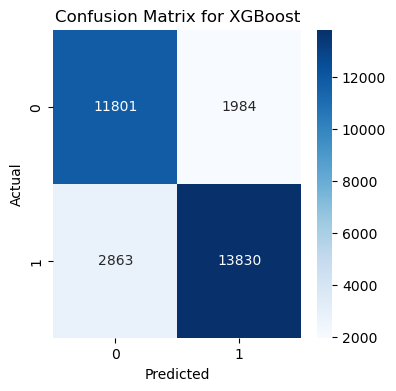

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_test_preds, labels=[0, 1], title='Confusion Matrix for Random Forest')

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_test_preds, labels=[0, 1], title='Confusion Matrix for XGBoost')


In [144]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_test_preds)

# Calculate confusion matrix for XGBoost
xgb_confusion_matrix = confusion_matrix(y_test, xgb_test_preds)

# Get the total number of positive and negative samples in the test set
total_positive = np.sum(y_test == 1)
total_negative = np.sum(y_test == 0)

# Calculate TP, TN, FP, FN as percentages for Random Forest
rf_tp_percentage = (rf_confusion_matrix[1, 1] / total_positive) * 100
rf_tn_percentage = (rf_confusion_matrix[0, 0] / total_negative) * 100
rf_fp_percentage = (rf_confusion_matrix[0, 1] / total_negative) * 100
rf_fn_percentage = (rf_confusion_matrix[1, 0] / total_positive) * 100

# Calculate TP, TN, FP, FN as percentages for XGBoost
xgb_tp_percentage = (xgb_confusion_matrix[1, 1] / total_positive) * 100
xgb_tn_percentage = (xgb_confusion_matrix[0, 0] / total_negative) * 100
xgb_fp_percentage = (xgb_confusion_matrix[0, 1] / total_negative) * 100
xgb_fn_percentage = (xgb_confusion_matrix[1, 0] / total_positive) * 100

print("Random Forest TP Percentage:", rf_tp_percentage)
print("Random Forest TN Percentage:", rf_tn_percentage)
print("Random Forest FP Percentage:", rf_fp_percentage)
print("Random Forest FN Percentage:", rf_fn_percentage)

print("XGBoost TP Percentage:", xgb_tp_percentage)
print("XGBoost TN Percentage:", xgb_tn_percentage)
print("XGBoost FP Percentage:", xgb_fp_percentage)
print("XGBoost FN Percentage:", xgb_fn_percentage)


Random Forest TP Percentage: 93.73989097226382
Random Forest TN Percentage: 93.88465723612623
Random Forest FP Percentage: 6.115342763873776
Random Forest FN Percentage: 6.260109027736177
XGBoost TP Percentage: 82.84909842448931
XGBoost TN Percentage: 85.607544432354
XGBoost FP Percentage: 14.392455567645992
XGBoost FN Percentage: 17.150901575510694


In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 Score for Random Forest
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)

# Calculate precision, recall, and F1 Score for XGBoost
xgb_precision = precision_score(y_test, xgb_test_preds)
xgb_recall = recall_score(y_test, xgb_test_preds)
xgb_f1_score = f1_score(y_test, xgb_test_preds)

# Create a Pandas DataFrame
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'TP Percentage', 'TN Percentage', 'FP Percentage', 'FN Percentage'],
    'Random Forest': [rf_precision, rf_recall, rf_f1_score, rf_tp_percentage, rf_tn_percentage, rf_fp_percentage, rf_fn_percentage],
    'XGBoost': [xgb_precision, xgb_recall, xgb_f1_score, xgb_tp_percentage, xgb_tn_percentage, xgb_fp_percentage, xgb_fn_percentage]
}

df = pd.DataFrame(data)

# Set the 'Metric' column as the index
df.set_index('Metric', inplace=True)

# Format the DataFrame to display percentages
for column in df.columns:
    if 'Percentage' in column:
        df[column] = df[column].map('{:.2f}%'.format)

# Display the DataFrame
print(df)


               Random Forest    XGBoost
Metric                                 
Precision           0.948881   0.874542
Recall              0.937399   0.828491
F1 Score            0.943105   0.850894
TP Percentage      93.739891  82.849098
TN Percentage      93.884657  85.607544
FP Percentage       6.115343  14.392456
FN Percentage       6.260109  17.150902


In [146]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 Score for Random Forest
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)

# Calculate precision, recall, and F1 Score for XGBoost
xgb_precision = precision_score(y_test, xgb_test_preds)
xgb_recall = recall_score(y_test, xgb_test_preds)
xgb_f1_score = f1_score(y_test, xgb_test_preds)

# Convert all scores to percentages and round to 2 decimals
rf_precision = round(rf_precision * 100, 2)
rf_recall = round(rf_recall * 100, 2)
rf_f1_score = round(rf_f1_score * 100, 2)

xgb_precision = round(xgb_precision * 100, 2)
xgb_recall = round(xgb_recall * 100, 2)
xgb_f1_score = round(xgb_f1_score * 100, 2)

# Create a Pandas DataFrame
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Random Forest': [rf_precision, rf_recall, rf_f1_score],
    'XGBoost': [xgb_precision, xgb_recall, xgb_f1_score]
}

df = pd.DataFrame(data)

# Set the 'Metric' column as the index
df.set_index('Metric', inplace=True)

# Format the DataFrame to display percentages
for column in df.columns:
    df[column] = df[column].astype(str) + '%'

# Display the DataFrame
print(df)


          Random Forest XGBoost
Metric                         
Precision        94.89%  87.45%
Recall           93.74%  82.85%
F1 Score         94.31%  85.09%


In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate precision, recall, and F1 Score for Random Forest
rf_precision = precision_score(y_test, rf_test_preds)
rf_recall = recall_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds)

# Calculate precision, recall, and F1 Score for XGBoost
xgb_precision = precision_score(y_test, xgb_test_preds)
xgb_recall = recall_score(y_test, xgb_test_preds)
xgb_f1_score = f1_score(y_test, xgb_test_preds)

# Calculate confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_test_preds)

# Calculate confusion matrix for XGBoost
xgb_confusion_matrix = confusion_matrix(y_test, xgb_test_preds)

# Get the total number of positive and negative samples in the test set
total_positive = np.sum(y_test == 1)
total_negative = np.sum(y_test == 0)

# Calculate TP, TN, FP, FN as percentages for Random Forest
rf_tp_percentage = (rf_confusion_matrix[1, 1] / total_positive) * 100
rf_tn_percentage = (rf_confusion_matrix[0, 0] / total_negative) * 100
rf_fp_percentage = (rf_confusion_matrix[0, 1] / total_negative) * 100
rf_fn_percentage = (rf_confusion_matrix[1, 0] / total_positive) * 100

# Calculate TP, TN, FP, FN as percentages for XGBoost
xgb_tp_percentage = (xgb_confusion_matrix[1, 1] / total_positive) * 100
xgb_tn_percentage = (xgb_confusion_matrix[0, 0] / total_negative) * 100
xgb_fp_percentage = (xgb_confusion_matrix[0, 1] / total_negative) * 100
xgb_fn_percentage = (xgb_confusion_matrix[1, 0] / total_positive) * 100

# Convert all scores to percentages and round to 2 decimals
rf_precision = round(rf_precision * 100, 2)
rf_recall = round(rf_recall * 100, 2)
rf_f1_score = round(rf_f1_score * 100, 2)

xgb_precision = round(xgb_precision * 100, 2)
xgb_recall = round(xgb_recall * 100, 2)
xgb_f1_score = round(xgb_f1_score * 100, 2)

# Create a Pandas DataFrame
data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'TP Percentage', 'TN Percentage', 'FP Percentage', 'FN Percentage'],
    'Random Forest': [rf_precision, rf_recall, rf_f1_score, rf_tp_percentage, rf_tn_percentage, rf_fp_percentage, rf_fn_percentage],
    'XGBoost': [xgb_precision, xgb_recall, xgb_f1_score, xgb_tp_percentage, xgb_tn_percentage, xgb_fp_percentage, xgb_fn_percentage]
}

df = pd.DataFrame(data)

# Set the 'Metric' column as the index
df.set_index('Metric', inplace=True)

# Format the DataFrame to display percentages
for column in df.columns:
    if 'Percentage' in column:
        df[column] = df[column].astype(str) + '%'

# Display the DataFrame
print(df)


               Random Forest    XGBoost
Metric                                 
Precision          94.890000  87.450000
Recall             93.740000  82.850000
F1 Score           94.310000  85.090000
TP Percentage      93.739891  82.849098
TN Percentage      93.884657  85.607544
FP Percentage       6.115343  14.392456
FN Percentage       6.260109  17.150902
